In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg as AR

#importing all the classifyers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA


from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

@ ------   dt


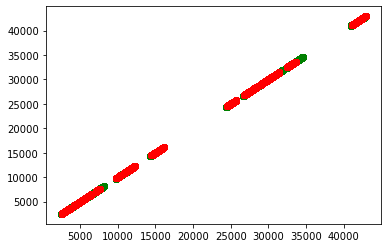

@ ------   switch


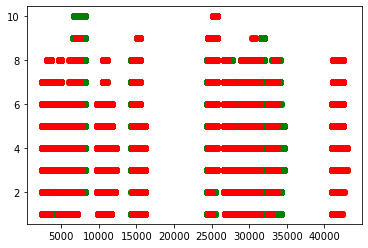

@ ------   pktcount


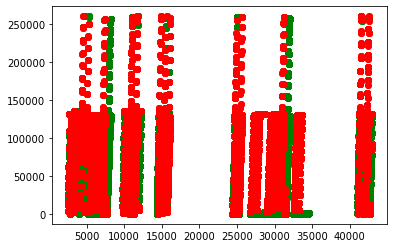

@ ------   bytecount


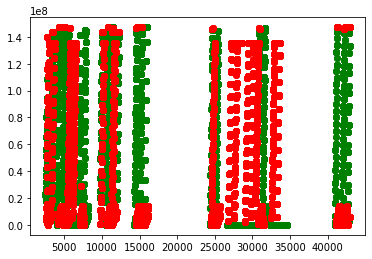

@ ------   dur


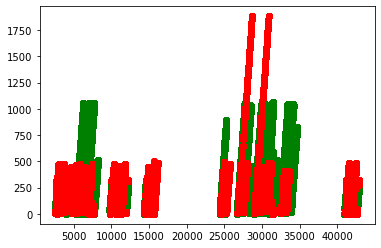

@ ------   dur_nsec


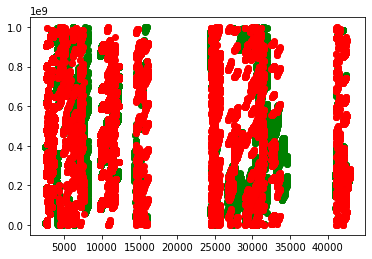

@ ------   tot_dur


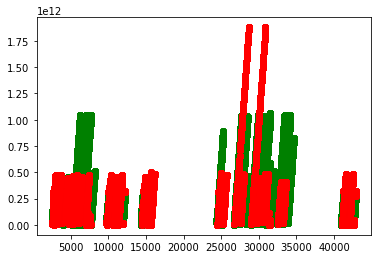

@ ------   flows


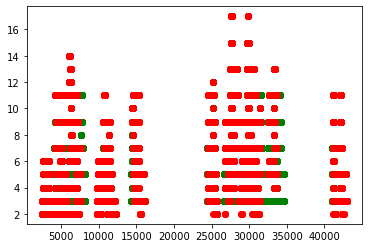

@ ------   packetins


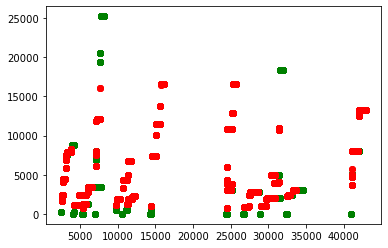

@ ------   pktperflow


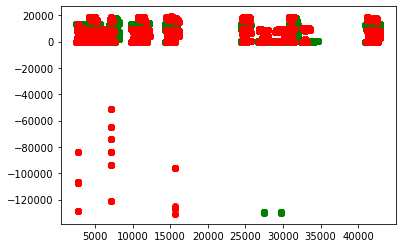

@ ------   byteperflow


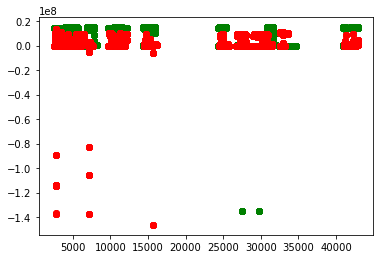

@ ------   pktrate


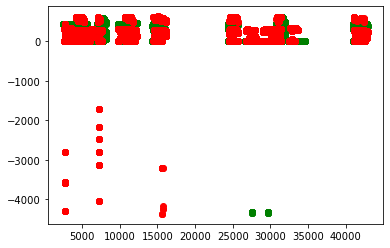

@ ------   Pairflow


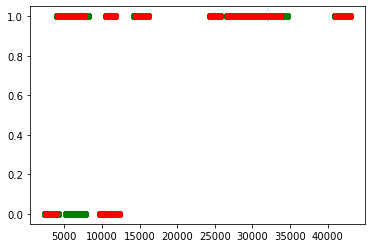

@ ------   port_no


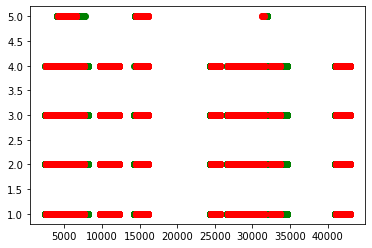

@ ------   tx_bytes


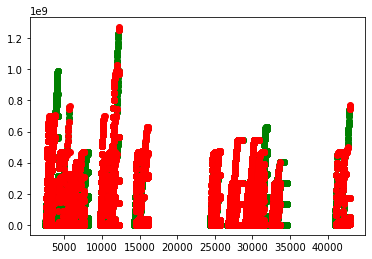

@ ------   rx_bytes


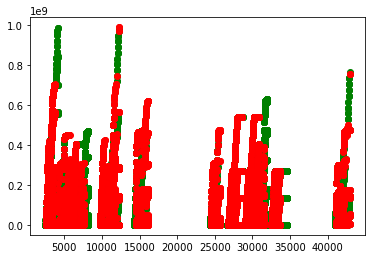

@ ------   tx_kbps


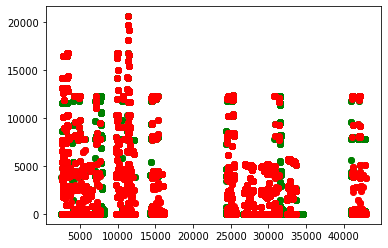

@ ------   0


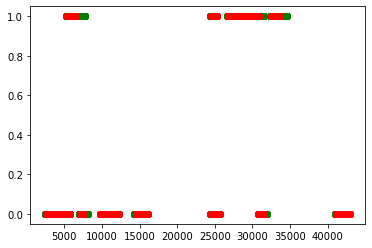

@ ------   1


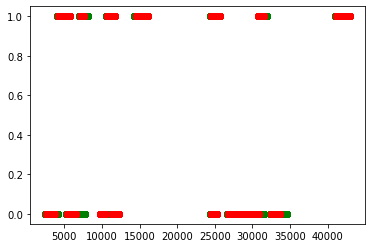

@ ------   2


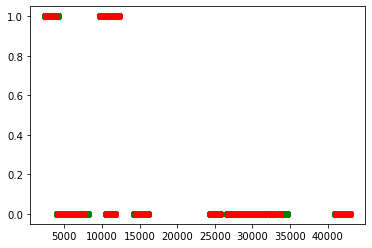

In [16]:
df = pd.read_csv("dataset_sdn.csv")
df=df.drop(["src"],axis=1)
df=df.drop(["dst"],axis=1)
df=df.drop(["rx_kbps"],axis=1)
df=df.drop(["tot_kbps"],axis=1)



## these things should not be dropped. we have to come up with something so that we can work on strings and NAN.

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Protocol']]).toarray())
final_df = df.join(encoder_df)
df_df=final_df.drop(["Protocol"],axis=1)

x=df_df.drop(["label"],axis=1)
y=df_df["label"]

x_train , x_test , y_train , y_test = train_test_split(x,y,
                                                       test_size=0.3,
                                                       random_state=42,
                                                       shuffle=True)

# pca=PCA(n_components=4)
# df_df=pca.fit_transform(df_df)

x_train["label"]=y_train

x_train_0=x_train[df_df["label"]==0]
x_train_1=x_train[df_df["label"]==1]
# y_test=pd.concat([x_train_0["label"],x_train_1["label"]],axis=0)


x_train_0=x_train_0.drop(["label"],axis=1)
x_train_1=x_train_1.drop(["label"],axis=1)

# ttest=pd.concat([x_train_0,x_train_1],axis=0)

ll=list(x_train_0.columns)
for i in ll:
    print("@ ------  ",i)
    plt.scatter(x_train_0["dt"],x_train_0[i],color="g")
    plt.scatter(x_train_1["dt"],x_train_1[i],color="r")
    plt.show()
# normalize=MinMaxScaler()
# normalize.fit(x_train)
# x_train_norm=normalize.transform(x_train)

# normalize.fit(x_test)
# x_test_norm=normalize.transform(x_test)

# print(x_train_0.columns)
# type(ttest)
# pca

In [13]:
df

dt  switch  pktcount  bytecount  dur   dur_nsec       tot_dur  \
0       11425       1     45304   48294064  100  716000000  1.010000e+11   
1       11605       1    126395  134737070  280  734000000  2.810000e+11   
2       11425       1     90333   96294978  200  744000000  2.010000e+11   
3       11425       1     90333   96294978  200  744000000  2.010000e+11   
4       11425       1     90333   96294978  200  744000000  2.010000e+11   
...       ...     ...       ...        ...  ...        ...           ...   
104340   5262       3        79       7742   81  842000000  8.184200e+10   
104341   5262       3        79       7742   81  842000000  8.184200e+10   
104342   5262       3        31       3038   31  805000000  3.180500e+10   
104343   5262       3        31       3038   31  805000000  3.180500e+10   
104344   5262       3        31       3038   31  805000000  3.180500e+10   

        flows  packetins  pktperflow  byteperflow  pktrate  Pairflow Protocol  \
0           3       1943       13535     14428310      451         0      UDP   
1           2       1943       13531     14424046      451         0      UDP   
2           3       1943       13534     14427244      451         0      UDP   
3           3       1943       13534     14427244      451         0      UDP   
4           3       1943       13534     14427244      451         0      UDP   
...       ...        ...         ...          ...      ...       ...      ...   
104340      5         10          29         2842        0         0     ICMP   
104341      5         10          29         2842        0         0     ICMP   
104342      5         10          30         2940        1         0     ICMP   
104343      5         10          30         2940        1         0     ICMP   
104344      5         10          30         2940        1         0     ICMP   

        port_no   tx_bytes  rx_bytes  tx_kbps  label  
0             3  143928631      3917        0      0  
1             4       3842      3520        0      0  
2             1       3795      1242        0      0  
3             2       3688      1492        0      0  
4             3       3413      3665        0      0  
...         ...        ...       ...      ...    ...  
104340        1      15209     12720        1      0  
104341        3      15099     14693        1      0  
104342        2       3409      3731        0      0  
104343        1      15209     12720        1      0  
104344        3      15099     14693        1      0  

[104345 rows x 19 columns]

@ For Q =  4  the confusion matrix and prediction score is : 
CONFUSION MATRIX 
[[18601   511]
 [ 3709  8483]]


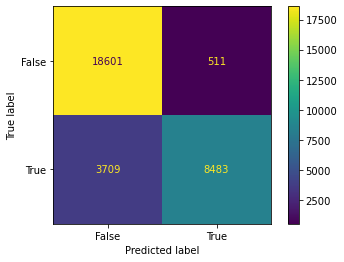

CLASSIFICATION ACCURACY  0.8651929465882954
 


In [6]:
gmm0=GaussianMixture(n_components = 4 , covariance_type ='full')
gmm0.fit(x_train_0)

gmm1=GaussianMixture(n_components = 4 , covariance_type ='full')     
gmm1.fit(x_train_1)

# making 2 GMM model for 2 classes 0 and 1

pre_ref=np.argmax([gmm0.score_samples(x_test),gmm1.score_samples(x_test)],axis=0)

ac_sc=accuracy_score(y_test,pre_ref)
con_m=confusion_matrix(y_test,pre_ref)
print("@ For Q = ",4," the confusion matrix and prediction score is : ")
print("CONFUSION MATRIX ")
print(con_m)
cm_display = ConfusionMatrixDisplay(confusion_matrix = con_m, display_labels = [False, True])
cm_display.plot()
plt.show()
print("CLASSIFICATION ACCURACY ",ac_sc)
print(" ")


In [ ]:
pre_ref

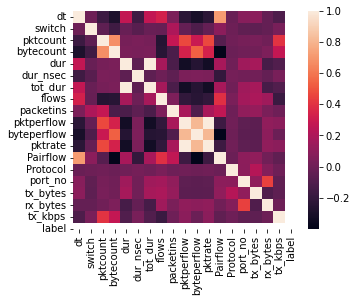

In [18]:
covar_matrix_original=df.corr()
col_names=df.columns
hm=sns.heatmap(covar_matrix_original,
               cbar=True,
               square=True,
               xticklabels=col_names,
               yticklabels=col_names)

@ For k =  1  the confusion matrix and prediction score is : 
CONFUSION MATRIX 
[[18584   528]
 [  628 11564]]


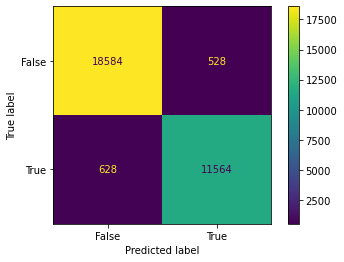

CLASSIFICATION ACCURACY  0.9630718119090212
 
@ For k =  3  the confusion matrix and prediction score is : 
CONFUSION MATRIX 
[[18544   568]
 [  715 11477]]


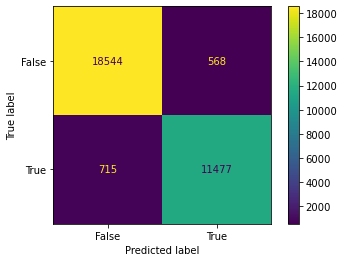

CLASSIFICATION ACCURACY  0.9590148223869154
 
@ For k =  5  the confusion matrix and prediction score is : 
CONFUSION MATRIX 
[[18480   632]
 [  743 11449]]


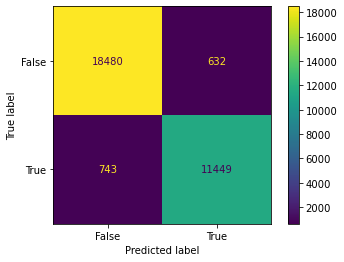

CLASSIFICATION ACCURACY  0.9560759008433427
 
@ For k =  7  the confusion matrix and prediction score is : 
CONFUSION MATRIX 
[[18441   671]
 [  770 11422]]


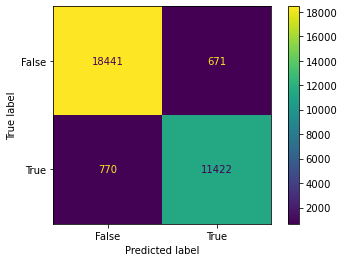

CLASSIFICATION ACCURACY  0.9539675440838231
 


In [4]:
k=[1,3,5,7]
t_nor=[]

for i in k:
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_norm,y_train)
    
    pre_ref=clf.predict(x_test_norm)
    ac_sc=accuracy_score(y_test,pre_ref)
    t_nor.append(ac_sc)
    con_m=confusion_matrix(y_test,pre_ref)
    print("@ For k = ",i," the confusion matrix and prediction score is : ")
    print("CONFUSION MATRIX ")
    print(con_m)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = con_m, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    print("CLASSIFICATION ACCURACY ",ac_sc)
    print(" ")

In [ ]:
df.corr()

@ ------   dt  vs  dt


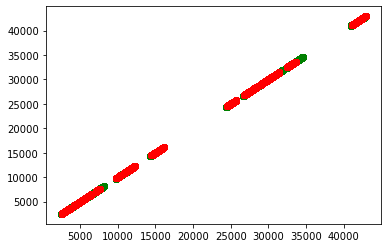

@ ------   dt  vs  switch


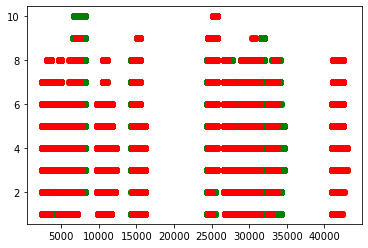

@ ------   dt  vs  pktcount


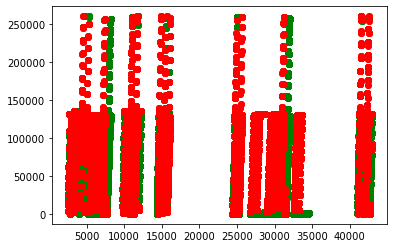

@ ------   dt  vs  bytecount


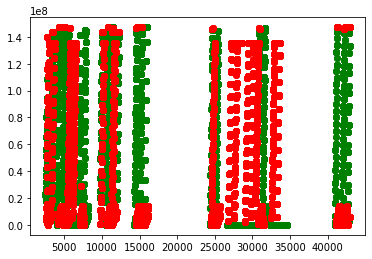

@ ------   dt  vs  dur


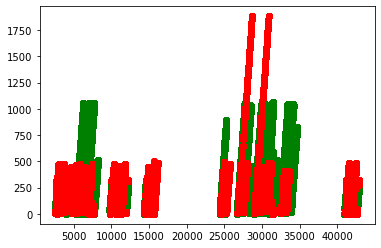

@ ------   dt  vs  dur_nsec


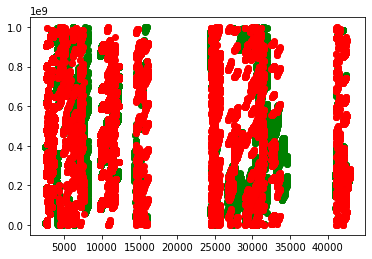

@ ------   dt  vs  tot_dur


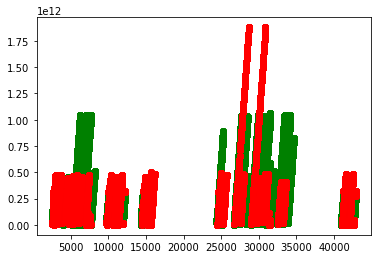

@ ------   dt  vs  flows


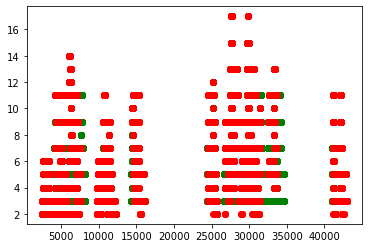

@ ------   dt  vs  packetins


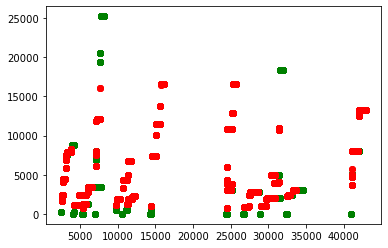

@ ------   dt  vs  pktperflow


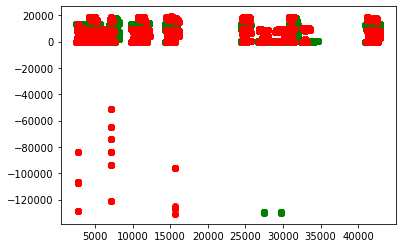

@ ------   dt  vs  byteperflow


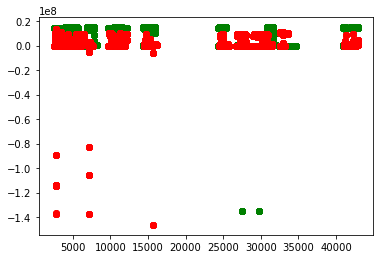

@ ------   dt  vs  pktrate


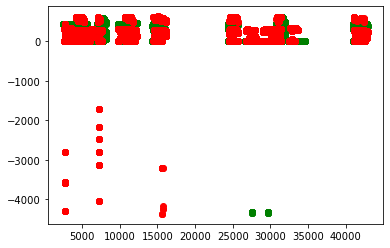

@ ------   dt  vs  Pairflow


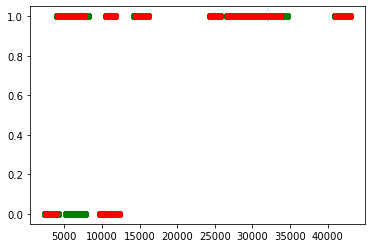

@ ------   dt  vs  port_no


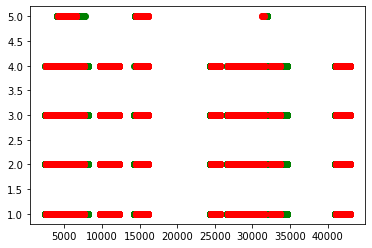

@ ------   dt  vs  tx_bytes


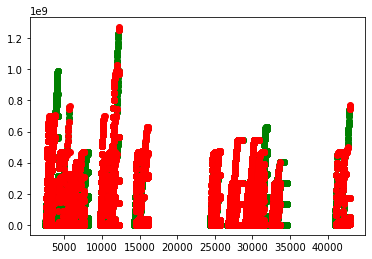

@ ------   dt  vs  rx_bytes


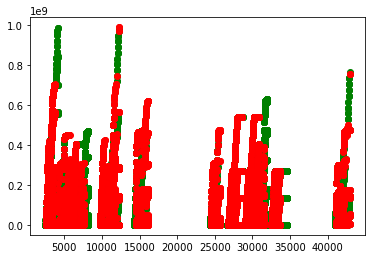

@ ------   dt  vs  tx_kbps


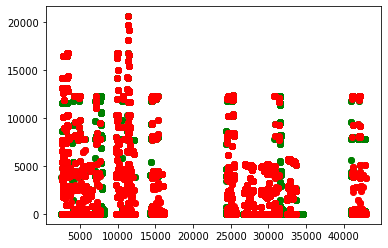

@ ------   dt  vs  0


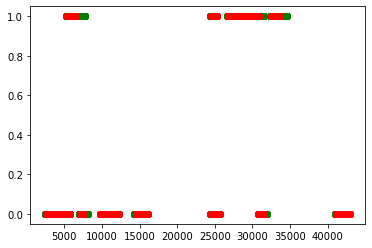

@ ------   dt  vs  1


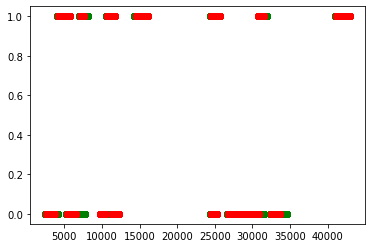

@ ------   dt  vs  2


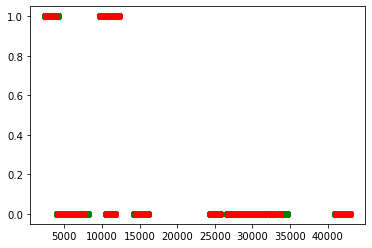

@ ------   switch  vs  dt


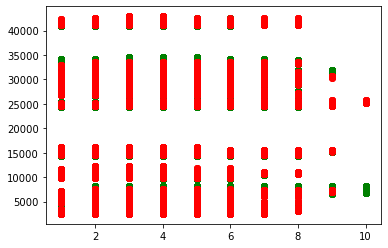

@ ------   switch  vs  switch


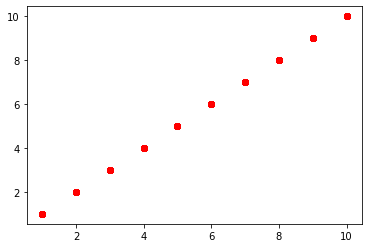

@ ------   switch  vs  pktcount


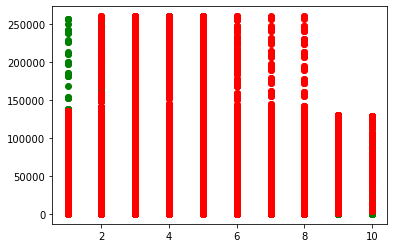

@ ------   switch  vs  bytecount


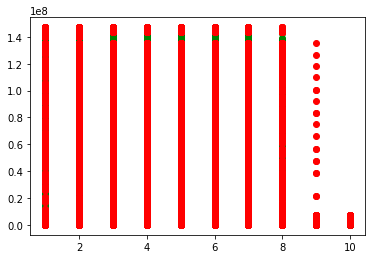

@ ------   switch  vs  dur


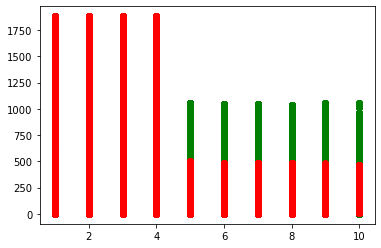

@ ------   switch  vs  dur_nsec


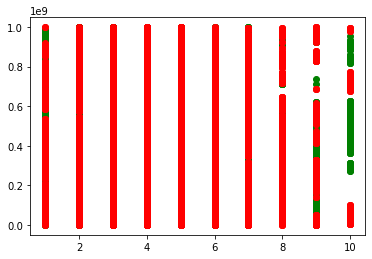

@ ------   switch  vs  tot_dur


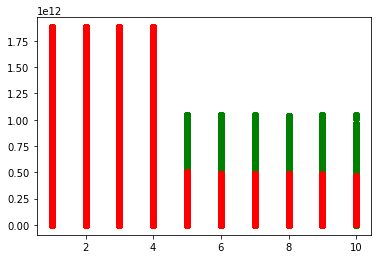

@ ------   switch  vs  flows


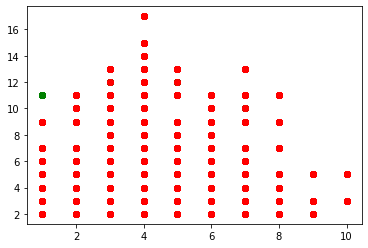

@ ------   switch  vs  packetins


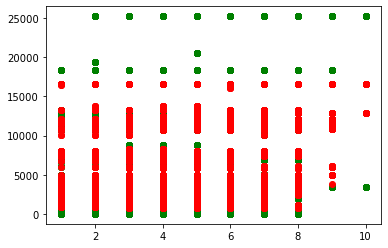

@ ------   switch  vs  pktperflow


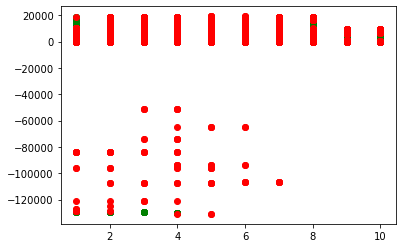

@ ------   switch  vs  byteperflow


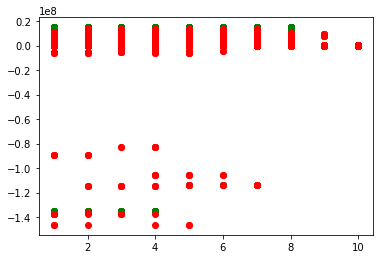

@ ------   switch  vs  pktrate


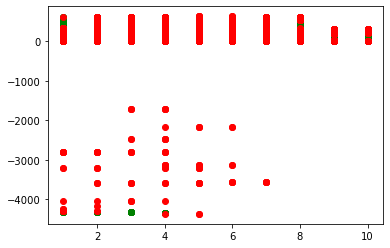

@ ------   switch  vs  Pairflow


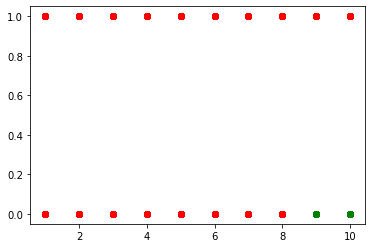

@ ------   switch  vs  port_no


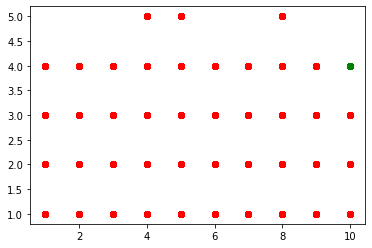

@ ------   switch  vs  tx_bytes


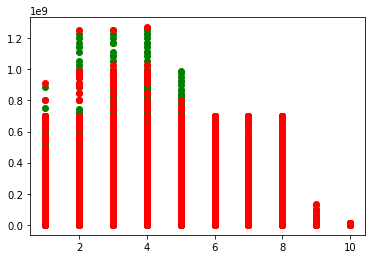

@ ------   switch  vs  rx_bytes


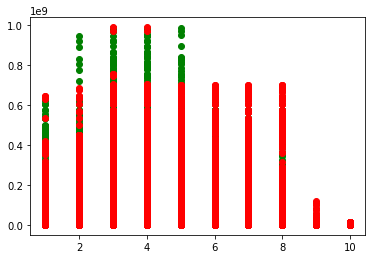

@ ------   switch  vs  tx_kbps


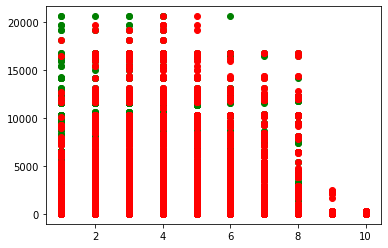

@ ------   switch  vs  0


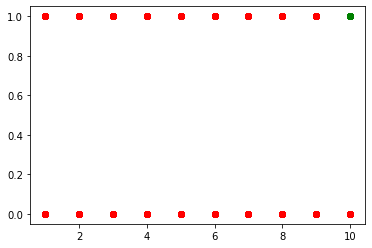

@ ------   switch  vs  1


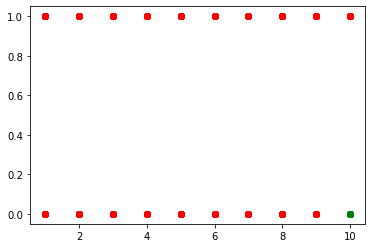

@ ------   switch  vs  2


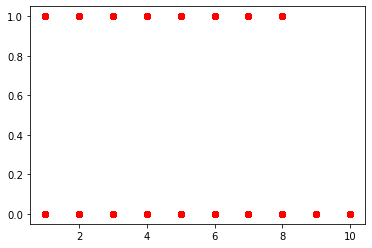

@ ------   pktcount  vs  dt


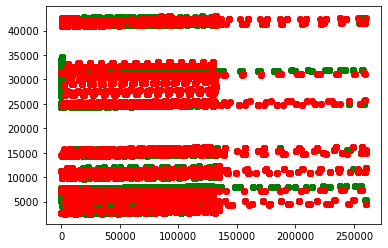

@ ------   pktcount  vs  switch


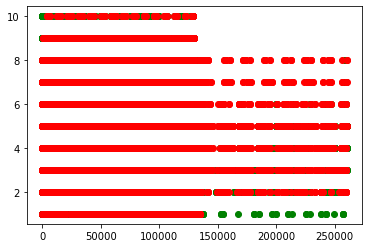

@ ------   pktcount  vs  pktcount


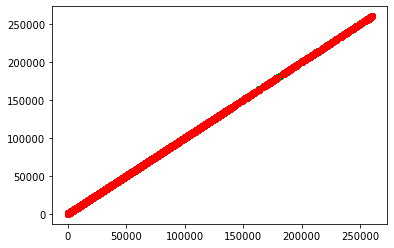

@ ------   pktcount  vs  bytecount


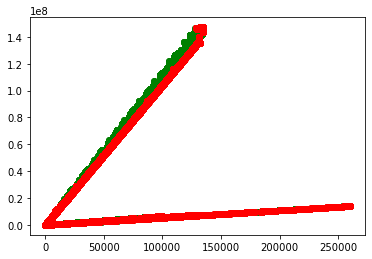

@ ------   pktcount  vs  dur


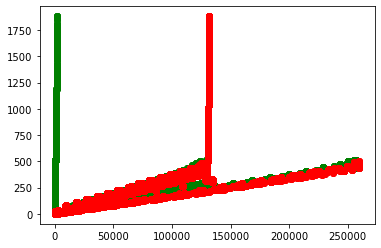

@ ------   pktcount  vs  dur_nsec


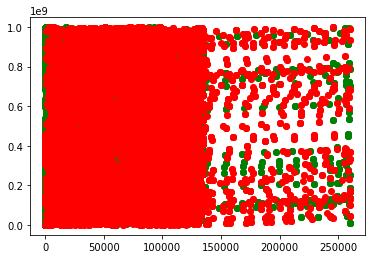

@ ------   pktcount  vs  tot_dur


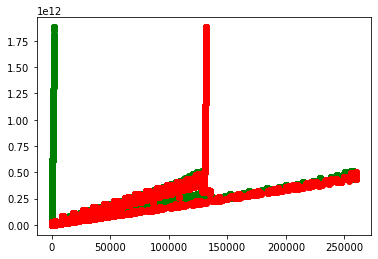

@ ------   pktcount  vs  flows


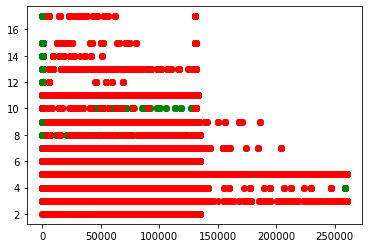

@ ------   pktcount  vs  packetins


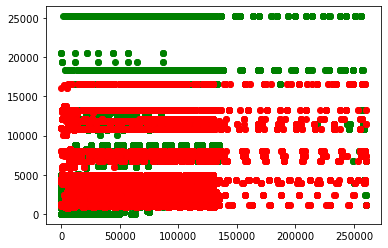

@ ------   pktcount  vs  pktperflow


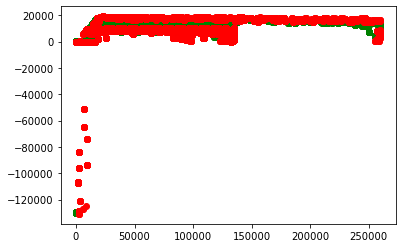

@ ------   pktcount  vs  byteperflow


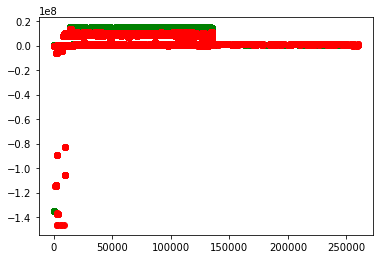

@ ------   pktcount  vs  pktrate


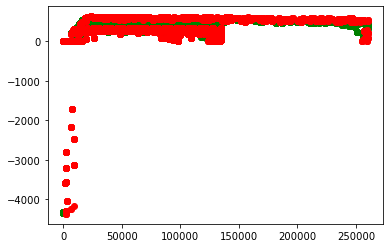

@ ------   pktcount  vs  Pairflow


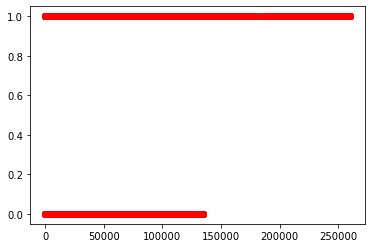

@ ------   pktcount  vs  port_no


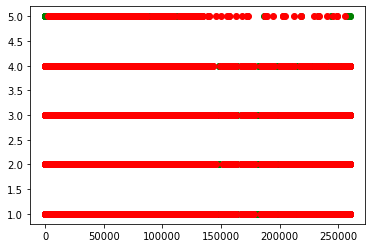

@ ------   pktcount  vs  tx_bytes


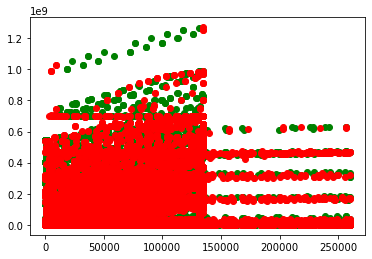

@ ------   pktcount  vs  rx_bytes


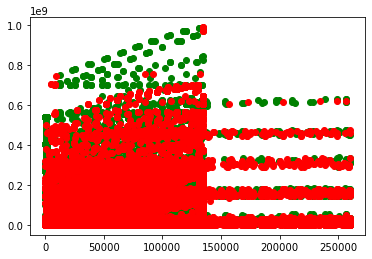

@ ------   pktcount  vs  tx_kbps


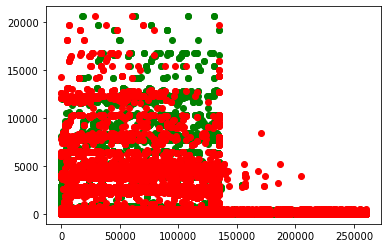

@ ------   pktcount  vs  0


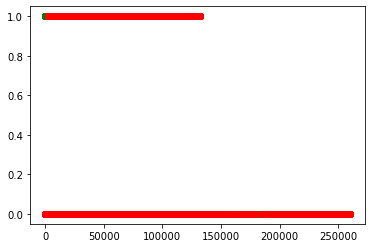

@ ------   pktcount  vs  1


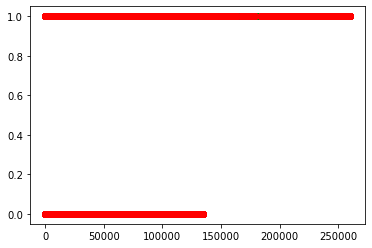

@ ------   pktcount  vs  2


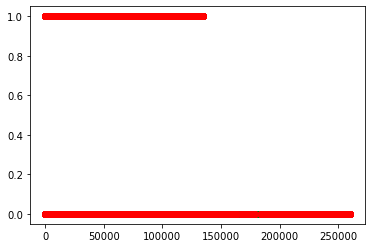

@ ------   bytecount  vs  dt


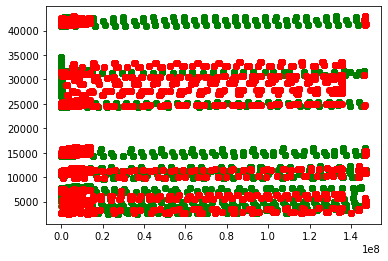

@ ------   bytecount  vs  switch


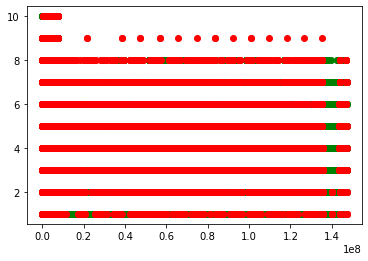

@ ------   bytecount  vs  pktcount


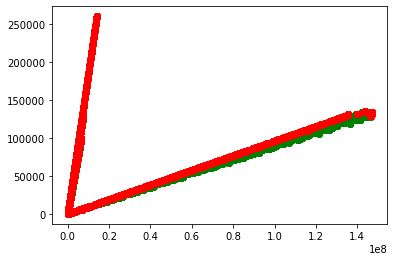

@ ------   bytecount  vs  bytecount


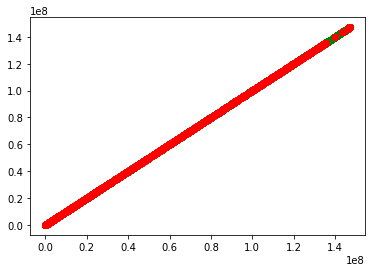

@ ------   bytecount  vs  dur


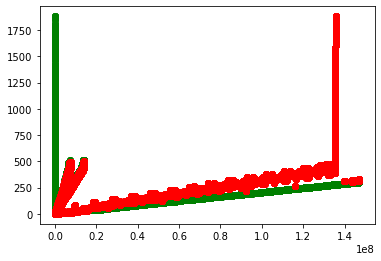

@ ------   bytecount  vs  dur_nsec


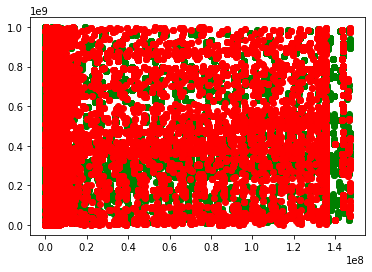

@ ------   bytecount  vs  tot_dur


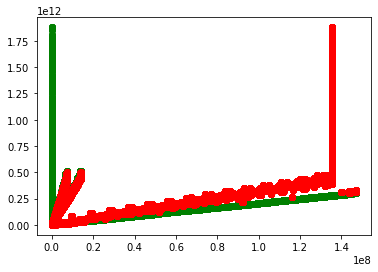

@ ------   bytecount  vs  flows


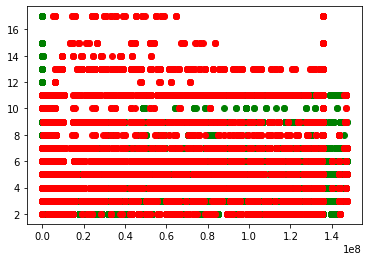

@ ------   bytecount  vs  packetins


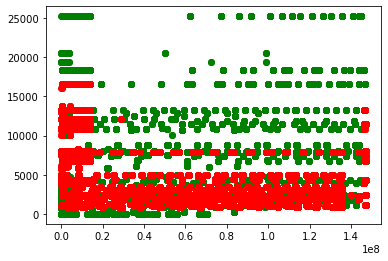

@ ------   bytecount  vs  pktperflow


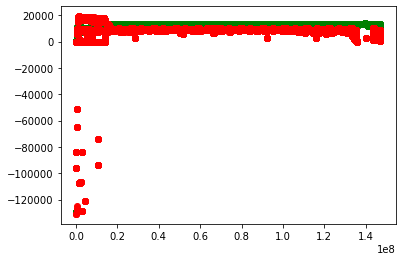

@ ------   bytecount  vs  byteperflow


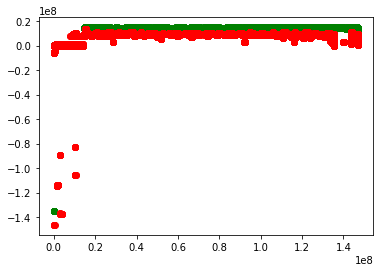

@ ------   bytecount  vs  pktrate


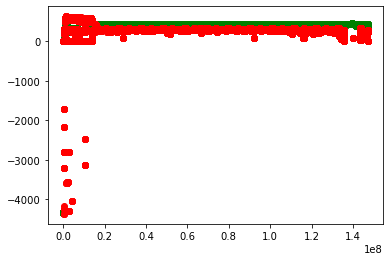

@ ------   bytecount  vs  Pairflow


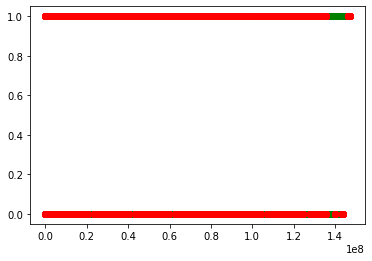

@ ------   bytecount  vs  port_no


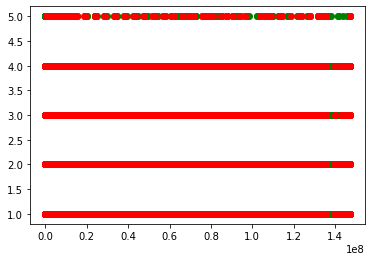

@ ------   bytecount  vs  tx_bytes


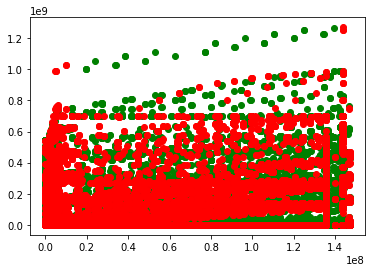

@ ------   bytecount  vs  rx_bytes


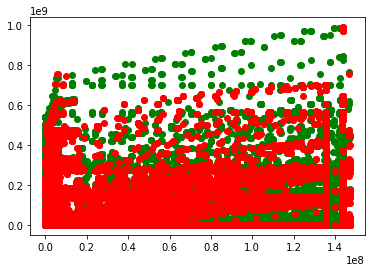

@ ------   bytecount  vs  tx_kbps


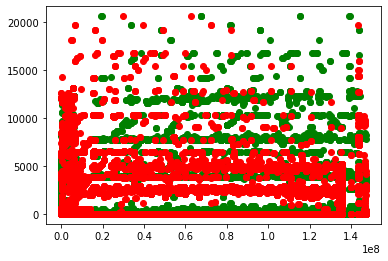

@ ------   bytecount  vs  0


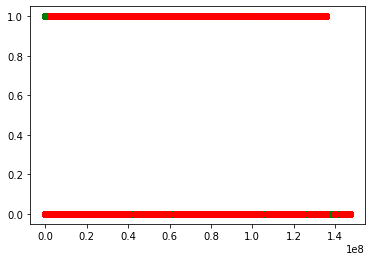

@ ------   bytecount  vs  1


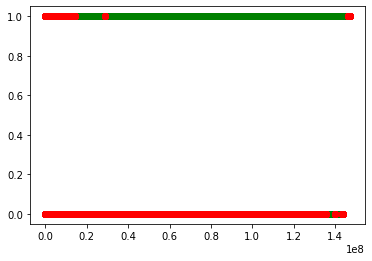

@ ------   bytecount  vs  2


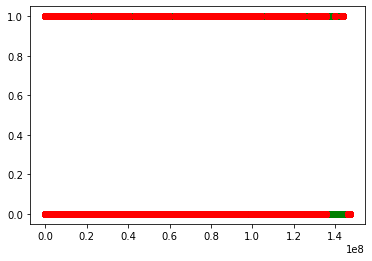

@ ------   dur  vs  dt


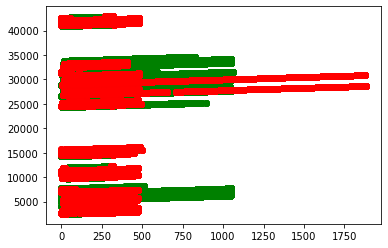

@ ------   dur  vs  switch


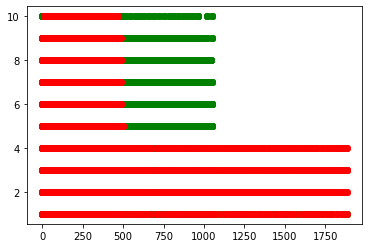

@ ------   dur  vs  pktcount


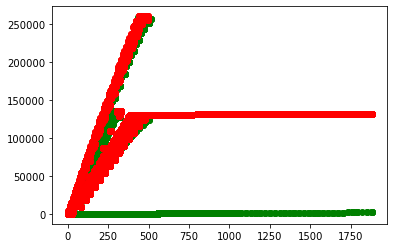

@ ------   dur  vs  bytecount


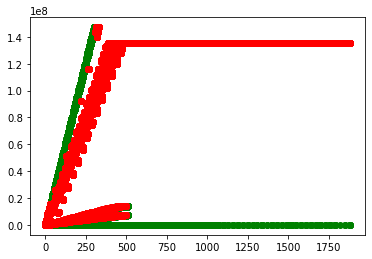

@ ------   dur  vs  dur


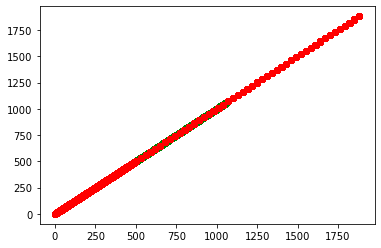

@ ------   dur  vs  dur_nsec


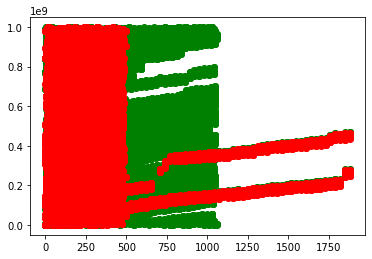

@ ------   dur  vs  tot_dur


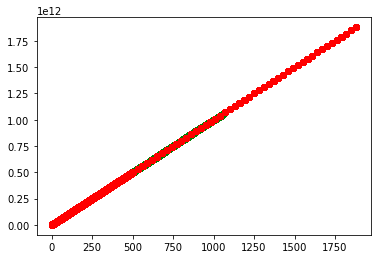

@ ------   dur  vs  flows


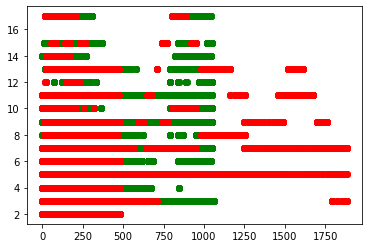

@ ------   dur  vs  packetins


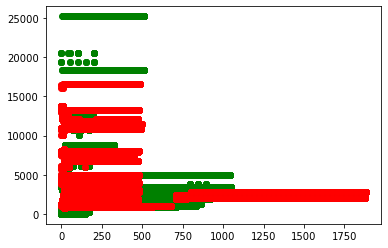

@ ------   dur  vs  pktperflow


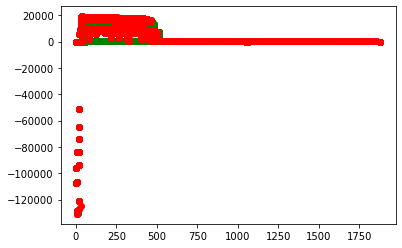

@ ------   dur  vs  byteperflow


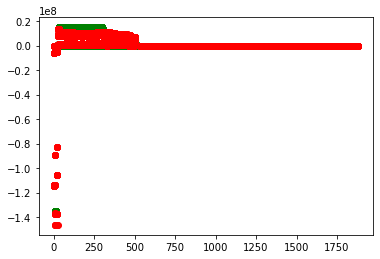

@ ------   dur  vs  pktrate


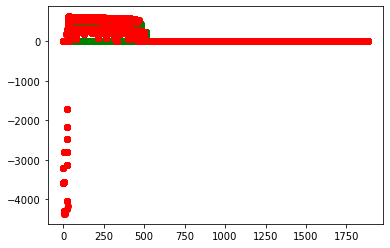

@ ------   dur  vs  Pairflow


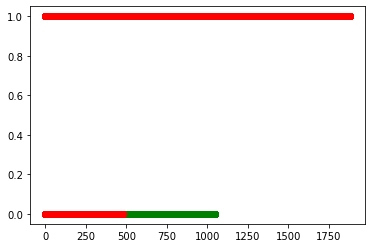

@ ------   dur  vs  port_no


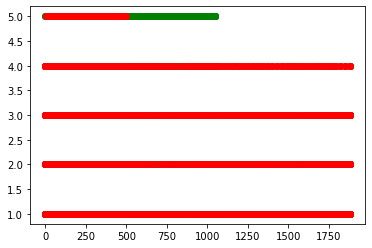

@ ------   dur  vs  tx_bytes


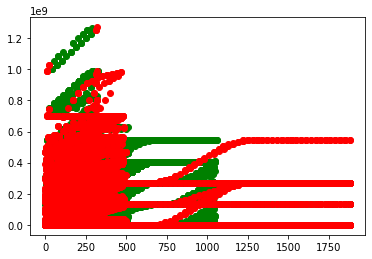

@ ------   dur  vs  rx_bytes


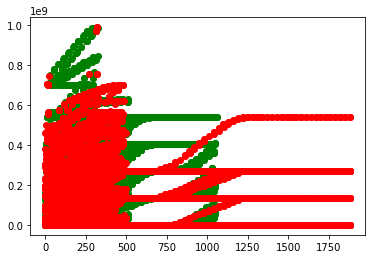

@ ------   dur  vs  tx_kbps


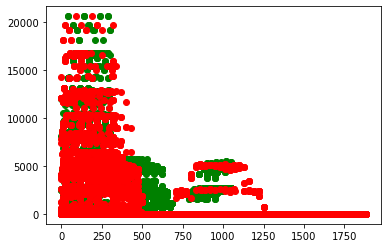

@ ------   dur  vs  0


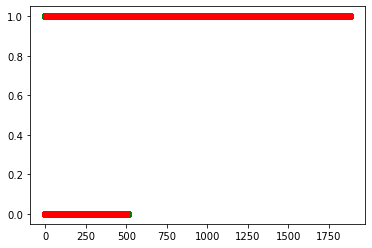

@ ------   dur  vs  1


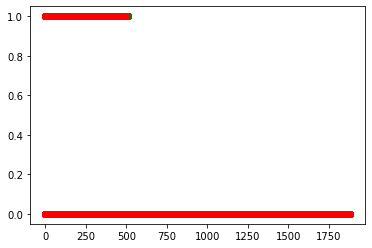

@ ------   dur  vs  2


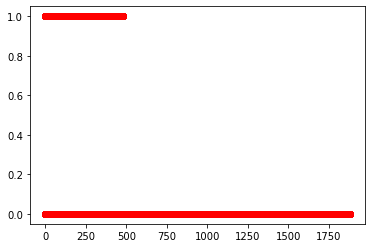

@ ------   dur_nsec  vs  dt


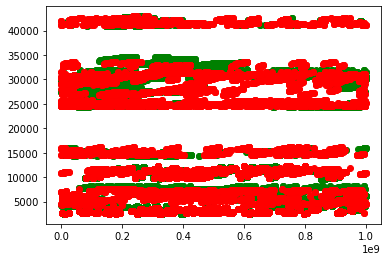

@ ------   dur_nsec  vs  switch


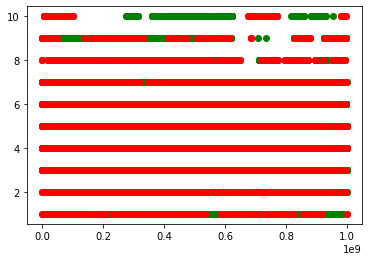

@ ------   dur_nsec  vs  pktcount


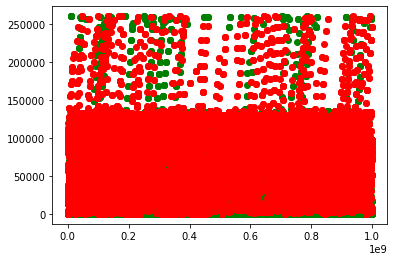

@ ------   dur_nsec  vs  bytecount


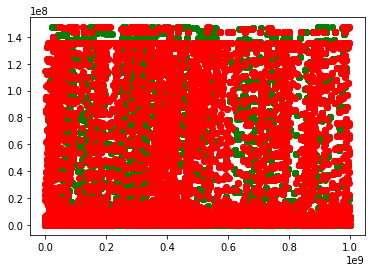

@ ------   dur_nsec  vs  dur


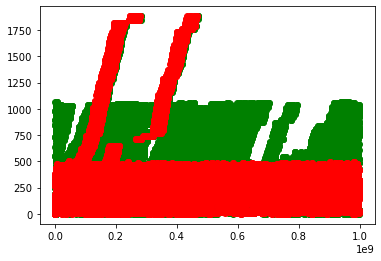

@ ------   dur_nsec  vs  dur_nsec


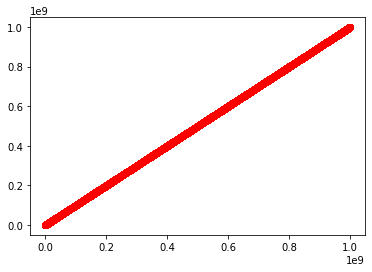

@ ------   dur_nsec  vs  tot_dur


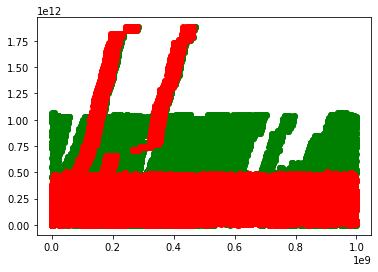

@ ------   dur_nsec  vs  flows


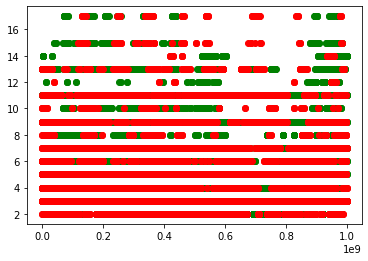

@ ------   dur_nsec  vs  packetins


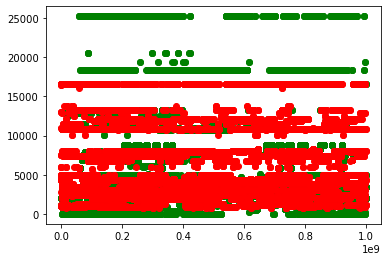

@ ------   dur_nsec  vs  pktperflow


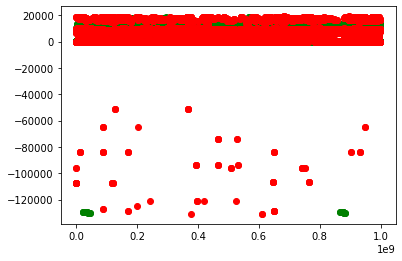

@ ------   dur_nsec  vs  byteperflow


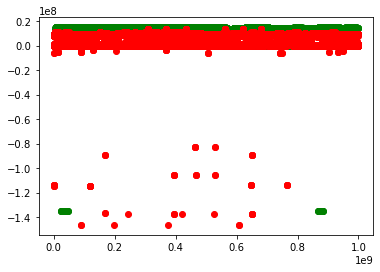

@ ------   dur_nsec  vs  pktrate


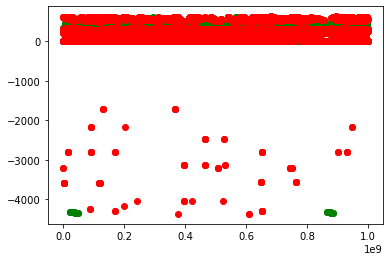

@ ------   dur_nsec  vs  Pairflow


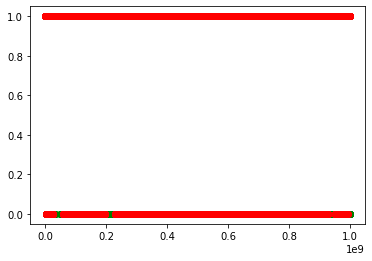

@ ------   dur_nsec  vs  port_no


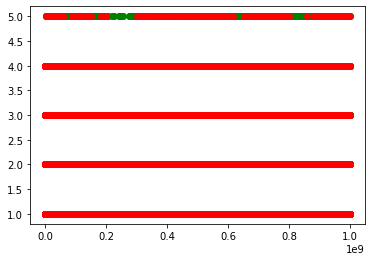

@ ------   dur_nsec  vs  tx_bytes


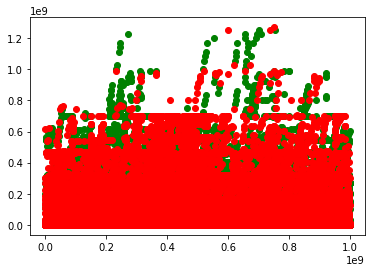

@ ------   dur_nsec  vs  rx_bytes


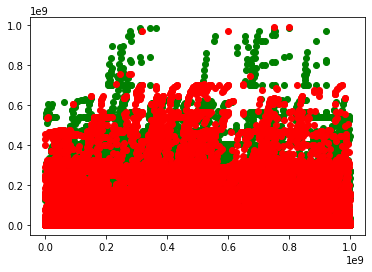

@ ------   dur_nsec  vs  tx_kbps


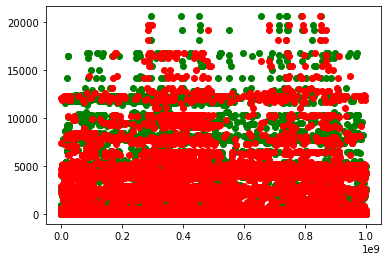

@ ------   dur_nsec  vs  0


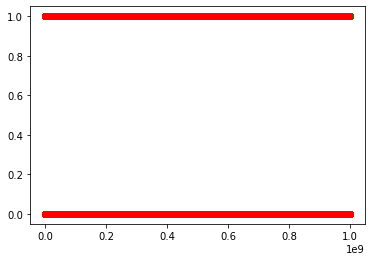

@ ------   dur_nsec  vs  1


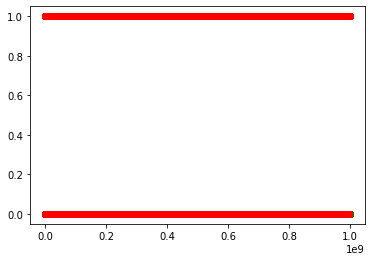

@ ------   dur_nsec  vs  2


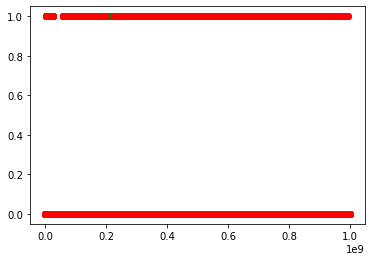

@ ------   tot_dur  vs  dt


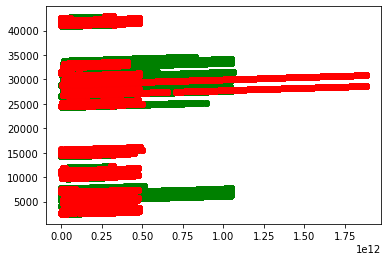

@ ------   tot_dur  vs  switch


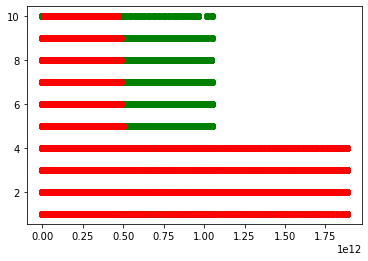

@ ------   tot_dur  vs  pktcount


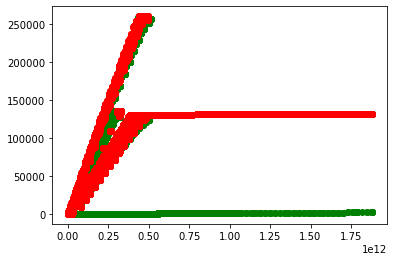

@ ------   tot_dur  vs  bytecount


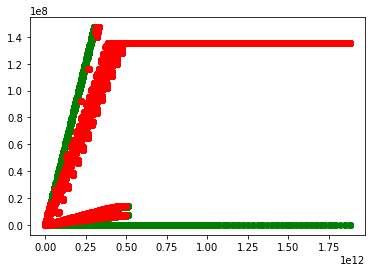

@ ------   tot_dur  vs  dur


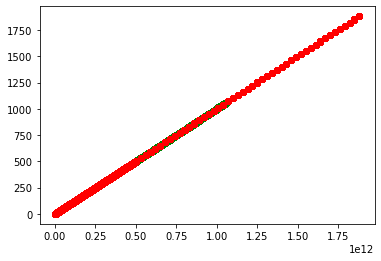

@ ------   tot_dur  vs  dur_nsec


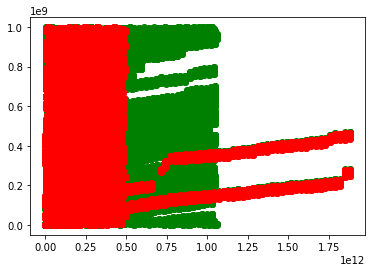

@ ------   tot_dur  vs  tot_dur


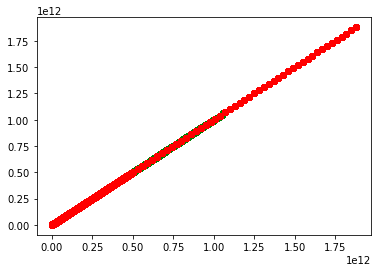

@ ------   tot_dur  vs  flows


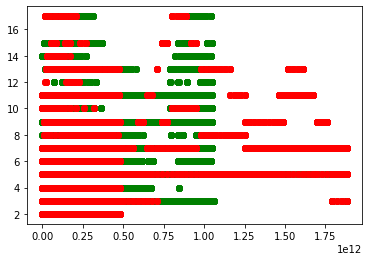

@ ------   tot_dur  vs  packetins


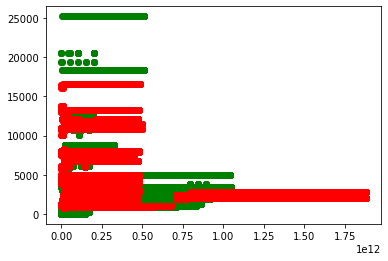

@ ------   tot_dur  vs  pktperflow


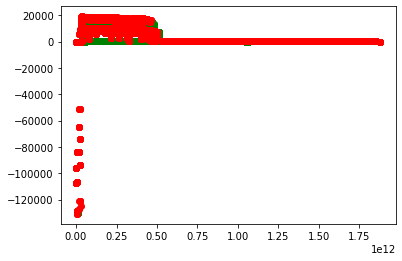

@ ------   tot_dur  vs  byteperflow


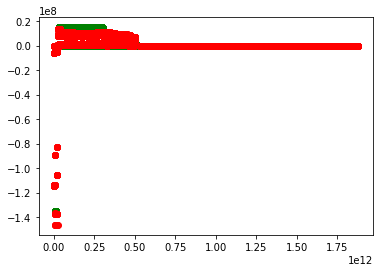

@ ------   tot_dur  vs  pktrate


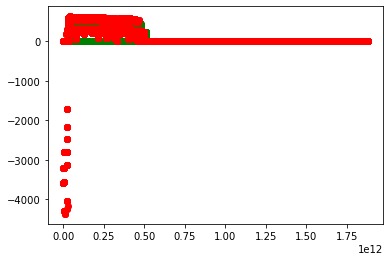

@ ------   tot_dur  vs  Pairflow


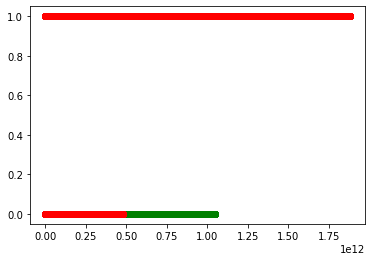

@ ------   tot_dur  vs  port_no


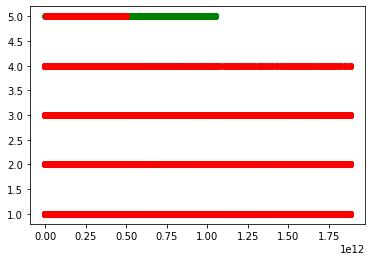

@ ------   tot_dur  vs  tx_bytes


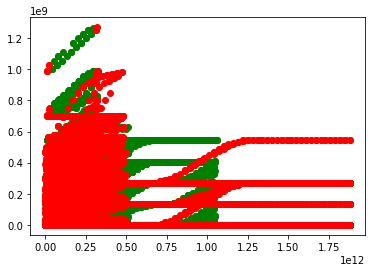

@ ------   tot_dur  vs  rx_bytes


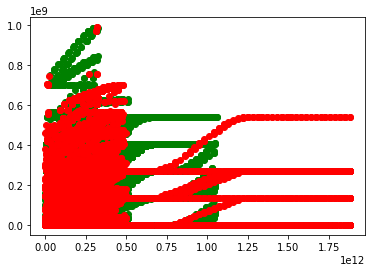

@ ------   tot_dur  vs  tx_kbps


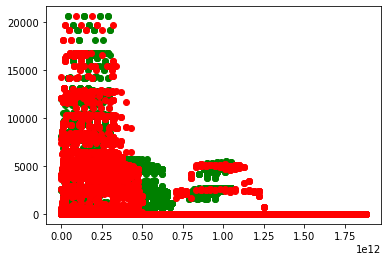

@ ------   tot_dur  vs  0


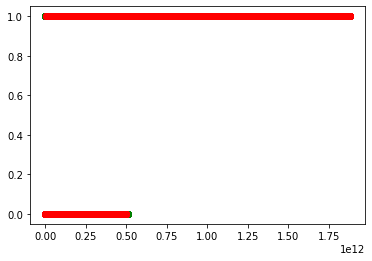

@ ------   tot_dur  vs  1


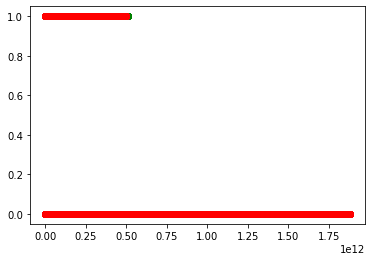

@ ------   tot_dur  vs  2


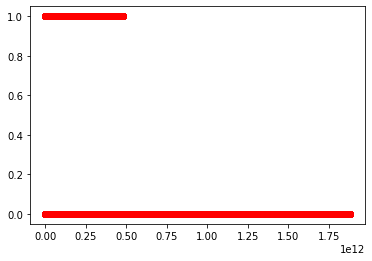

@ ------   flows  vs  dt


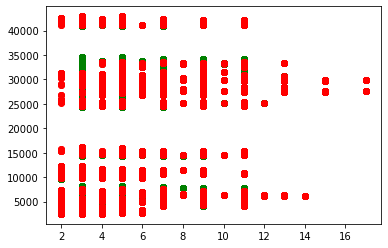

@ ------   flows  vs  switch


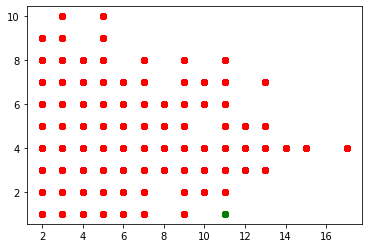

@ ------   flows  vs  pktcount


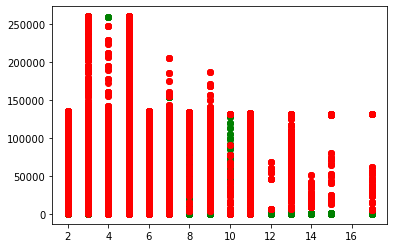

@ ------   flows  vs  bytecount


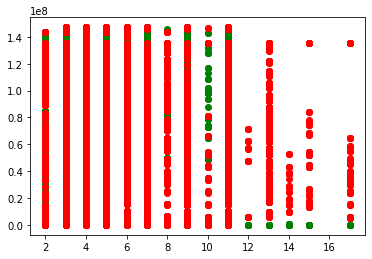

@ ------   flows  vs  dur


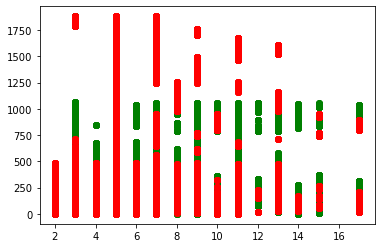

@ ------   flows  vs  dur_nsec


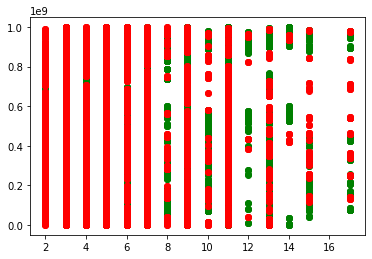

@ ------   flows  vs  tot_dur


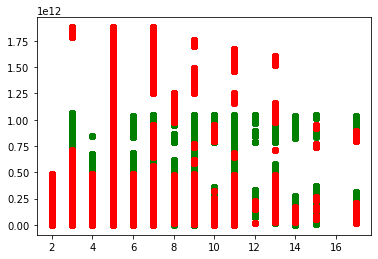

@ ------   flows  vs  flows


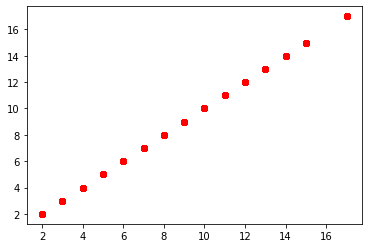

@ ------   flows  vs  packetins


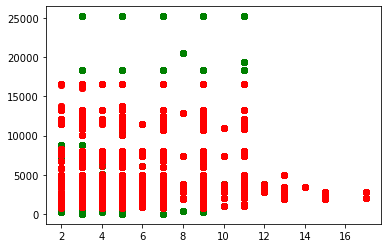

@ ------   flows  vs  pktperflow


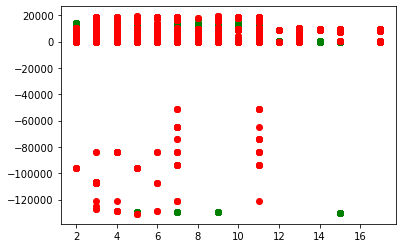

@ ------   flows  vs  byteperflow


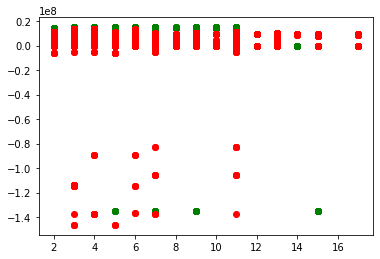

@ ------   flows  vs  pktrate


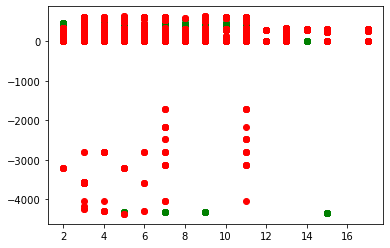

@ ------   flows  vs  Pairflow


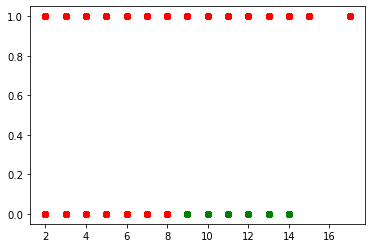

@ ------   flows  vs  port_no


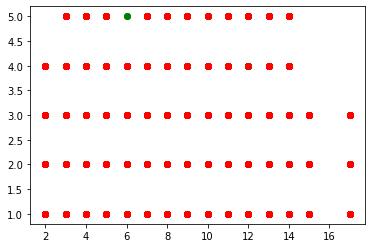

@ ------   flows  vs  tx_bytes


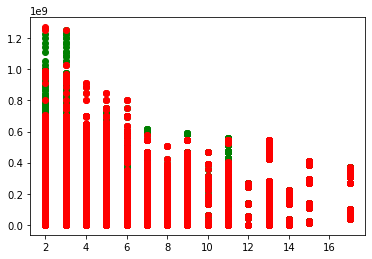

@ ------   flows  vs  rx_bytes


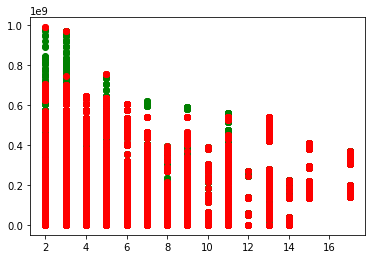

@ ------   flows  vs  tx_kbps


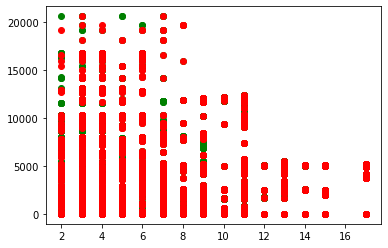

@ ------   flows  vs  0


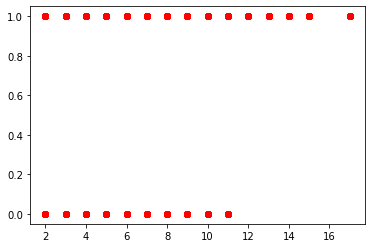

@ ------   flows  vs  1


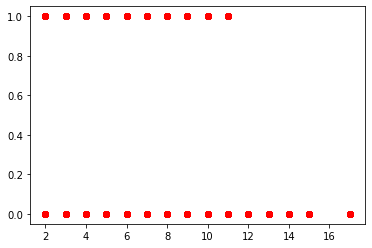

@ ------   flows  vs  2


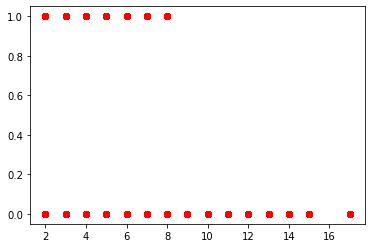

@ ------   packetins  vs  dt


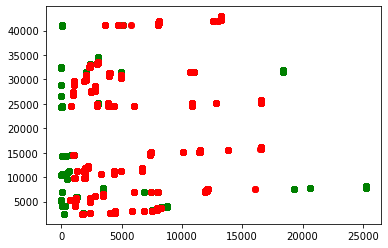

@ ------   packetins  vs  switch


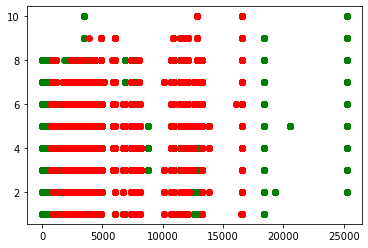

@ ------   packetins  vs  pktcount


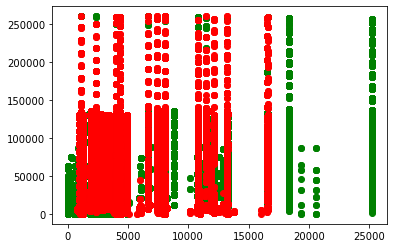

@ ------   packetins  vs  bytecount


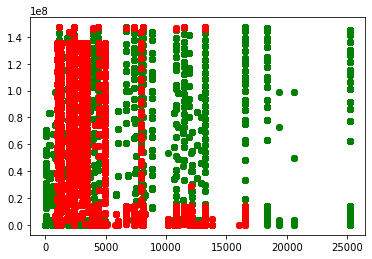

@ ------   packetins  vs  dur


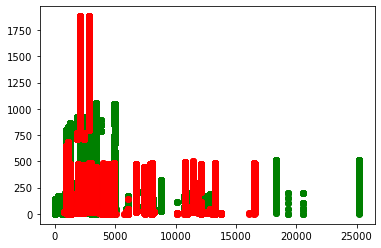

@ ------   packetins  vs  dur_nsec


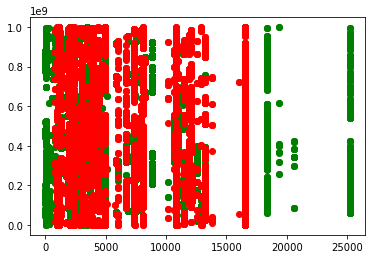

@ ------   packetins  vs  tot_dur


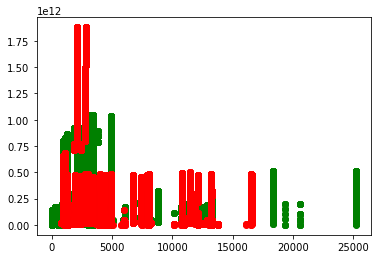

@ ------   packetins  vs  flows


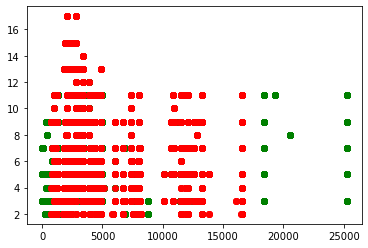

@ ------   packetins  vs  packetins


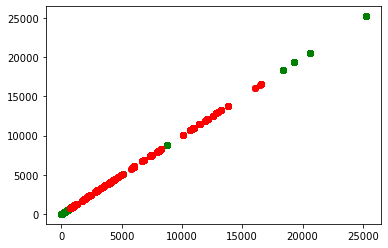

@ ------   packetins  vs  pktperflow


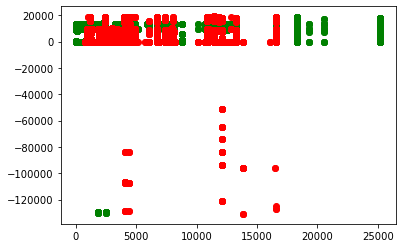

@ ------   packetins  vs  byteperflow


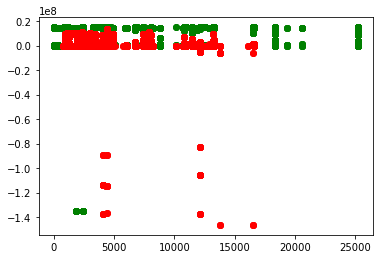

@ ------   packetins  vs  pktrate


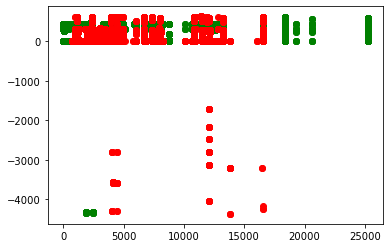

@ ------   packetins  vs  Pairflow


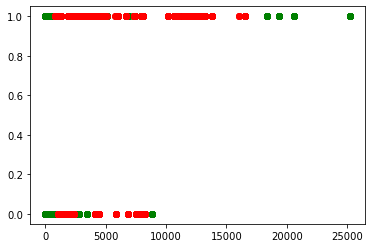

@ ------   packetins  vs  port_no


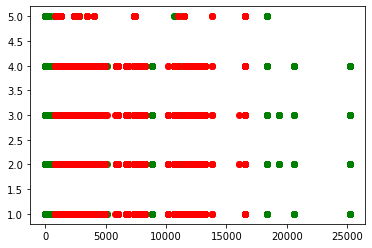

@ ------   packetins  vs  tx_bytes


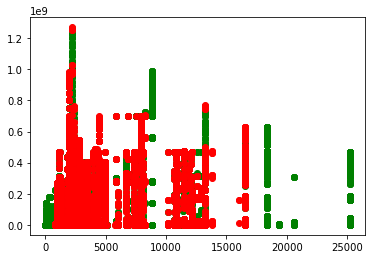

@ ------   packetins  vs  rx_bytes


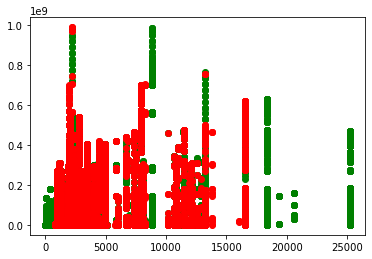

@ ------   packetins  vs  tx_kbps


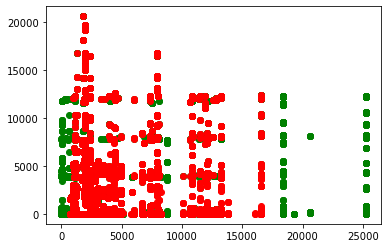

@ ------   packetins  vs  0


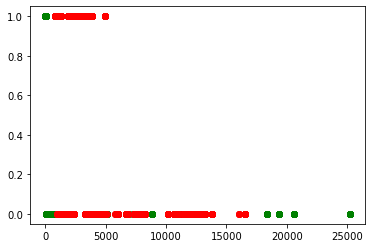

@ ------   packetins  vs  1


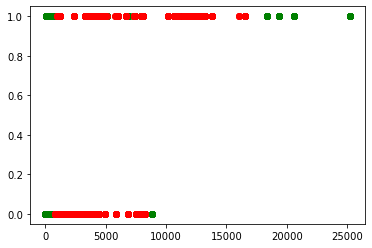

@ ------   packetins  vs  2


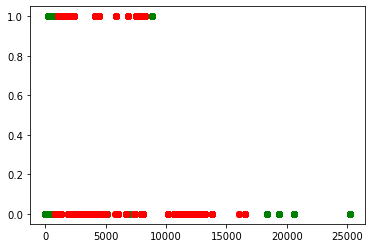

@ ------   pktperflow  vs  dt


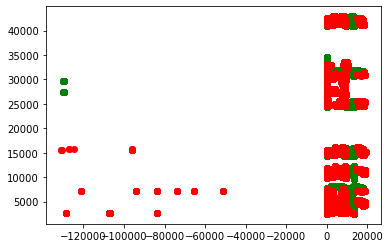

@ ------   pktperflow  vs  switch


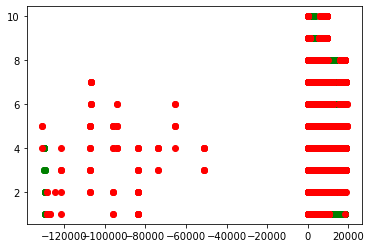

@ ------   pktperflow  vs  pktcount


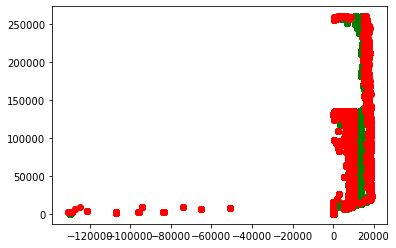

@ ------   pktperflow  vs  bytecount


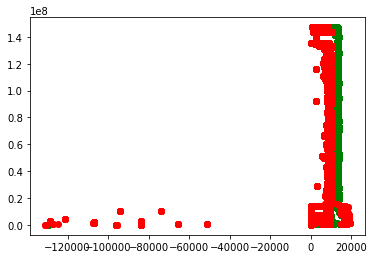

@ ------   pktperflow  vs  dur


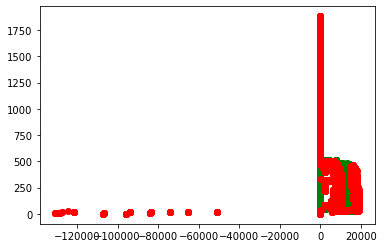

@ ------   pktperflow  vs  dur_nsec


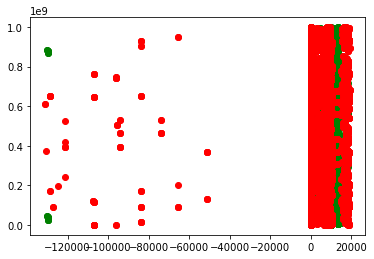

@ ------   pktperflow  vs  tot_dur


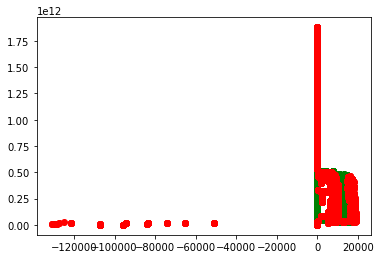

@ ------   pktperflow  vs  flows


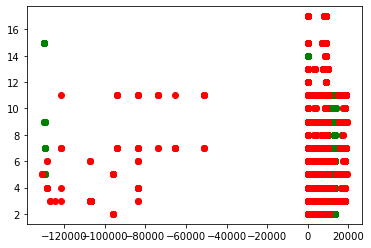

@ ------   pktperflow  vs  packetins


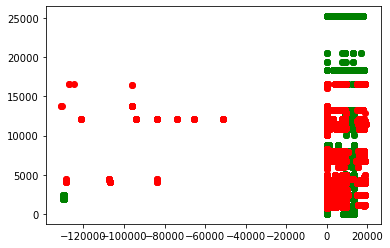

@ ------   pktperflow  vs  pktperflow


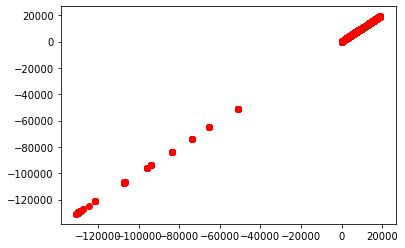

@ ------   pktperflow  vs  byteperflow


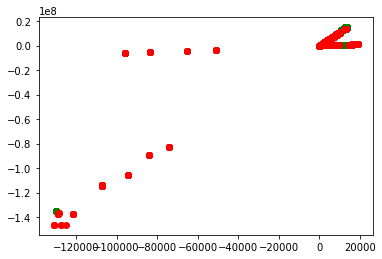

@ ------   pktperflow  vs  pktrate


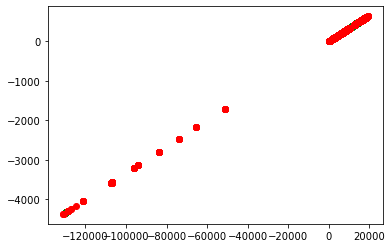

@ ------   pktperflow  vs  Pairflow


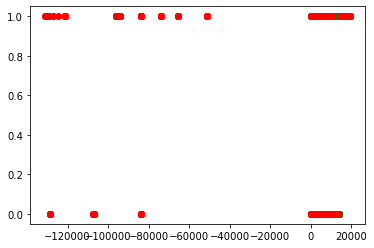

@ ------   pktperflow  vs  port_no


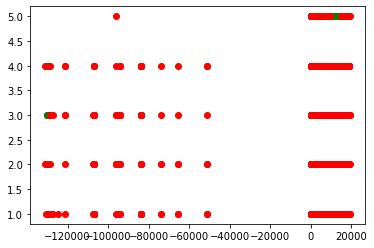

@ ------   pktperflow  vs  tx_bytes


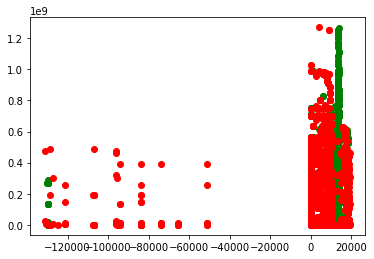

@ ------   pktperflow  vs  rx_bytes


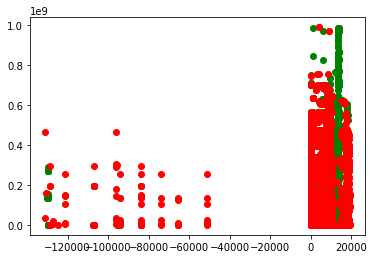

@ ------   pktperflow  vs  tx_kbps


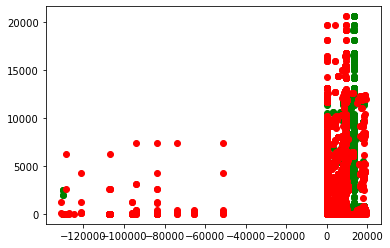

@ ------   pktperflow  vs  0


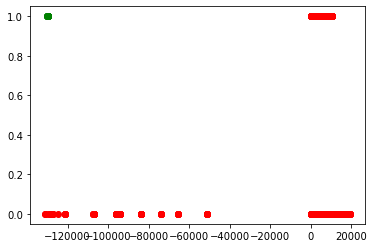

@ ------   pktperflow  vs  1


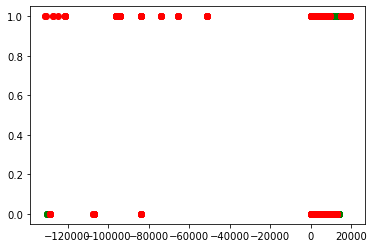

@ ------   pktperflow  vs  2


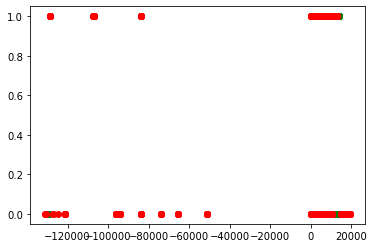

@ ------   byteperflow  vs  dt


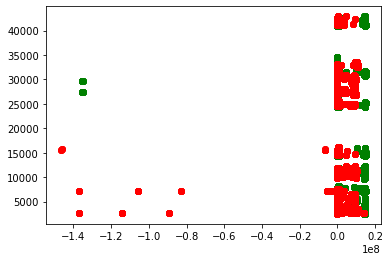

@ ------   byteperflow  vs  switch


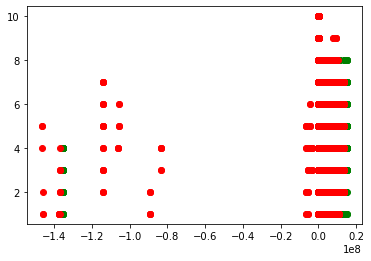

@ ------   byteperflow  vs  pktcount


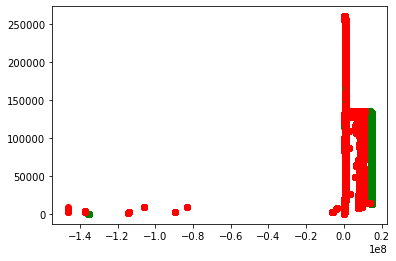

@ ------   byteperflow  vs  bytecount


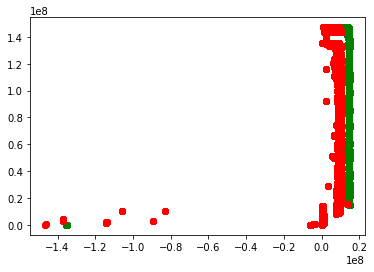

@ ------   byteperflow  vs  dur


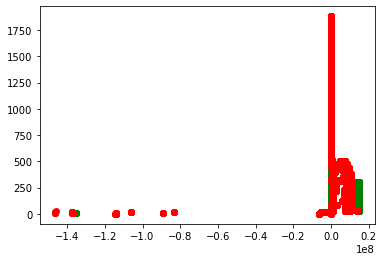

@ ------   byteperflow  vs  dur_nsec


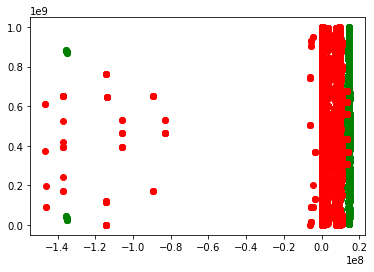

@ ------   byteperflow  vs  tot_dur


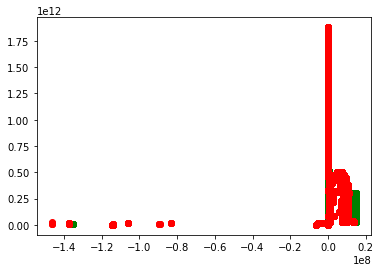

@ ------   byteperflow  vs  flows


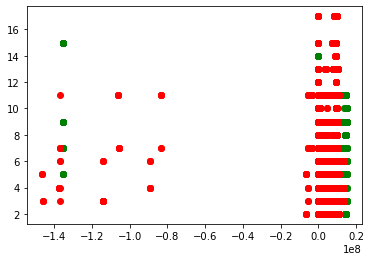

@ ------   byteperflow  vs  packetins


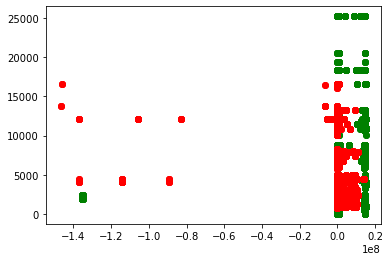

@ ------   byteperflow  vs  pktperflow


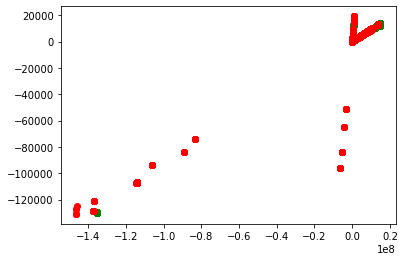

@ ------   byteperflow  vs  byteperflow


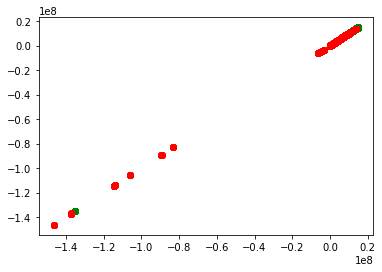

@ ------   byteperflow  vs  pktrate


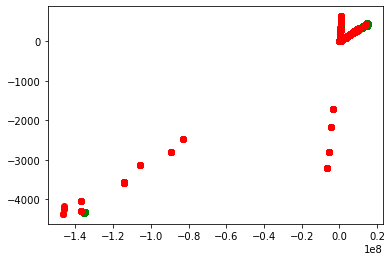

@ ------   byteperflow  vs  Pairflow


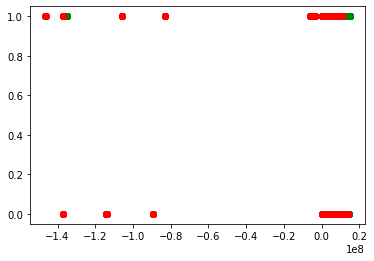

@ ------   byteperflow  vs  port_no


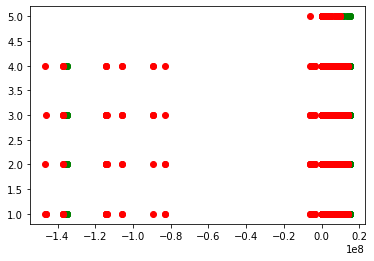

@ ------   byteperflow  vs  tx_bytes


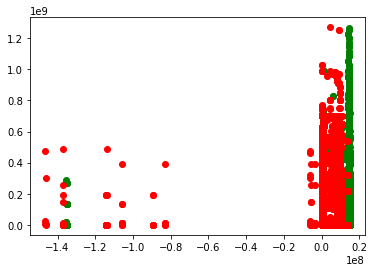

@ ------   byteperflow  vs  rx_bytes


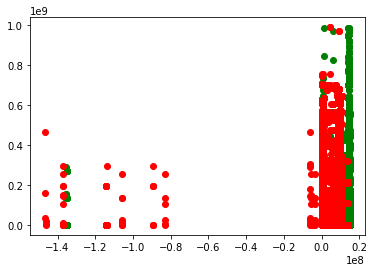

@ ------   byteperflow  vs  tx_kbps


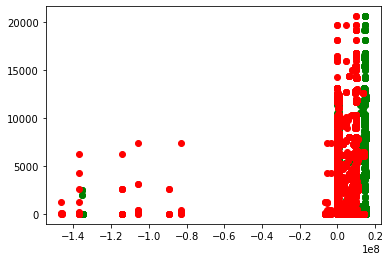

@ ------   byteperflow  vs  0


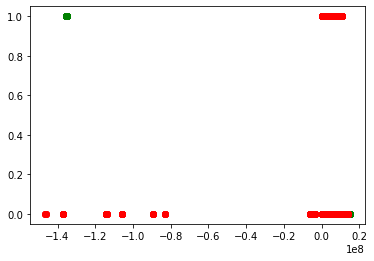

@ ------   byteperflow  vs  1


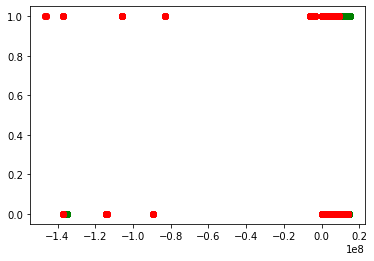

@ ------   byteperflow  vs  2


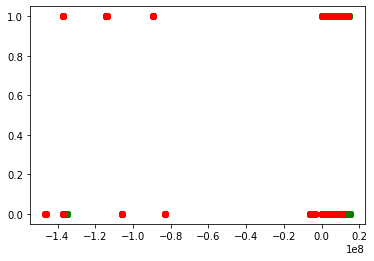

@ ------   pktrate  vs  dt


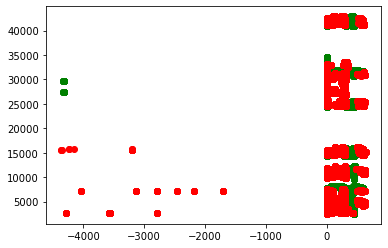

@ ------   pktrate  vs  switch


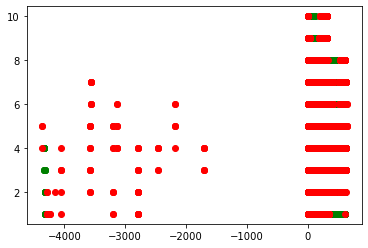

@ ------   pktrate  vs  pktcount


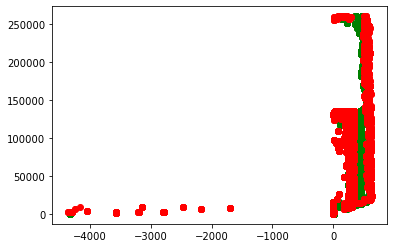

@ ------   pktrate  vs  bytecount


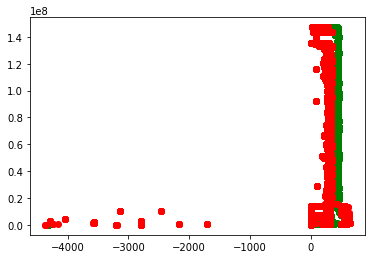

@ ------   pktrate  vs  dur


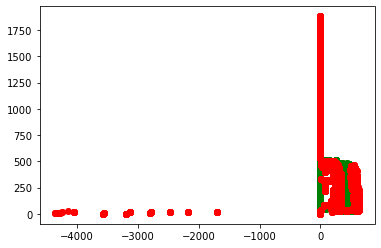

@ ------   pktrate  vs  dur_nsec


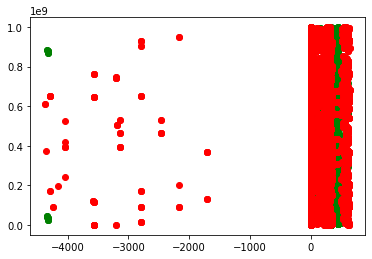

@ ------   pktrate  vs  tot_dur


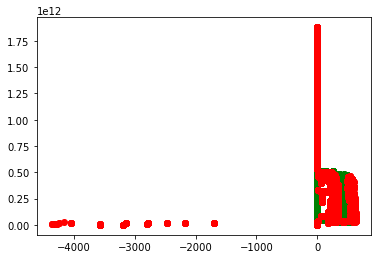

@ ------   pktrate  vs  flows


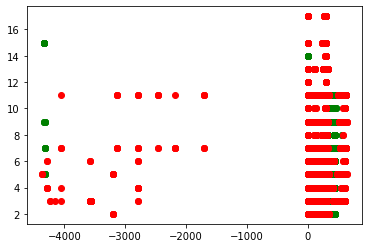

@ ------   pktrate  vs  packetins


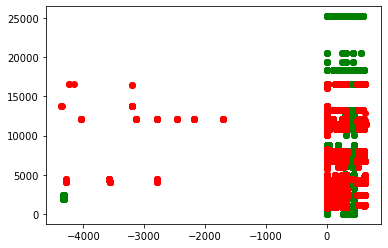

@ ------   pktrate  vs  pktperflow


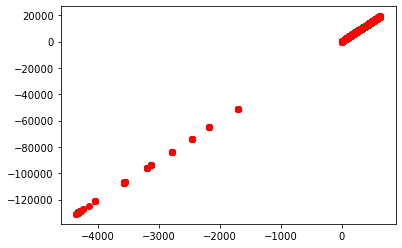

@ ------   pktrate  vs  byteperflow


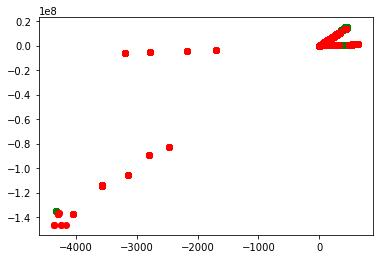

@ ------   pktrate  vs  pktrate


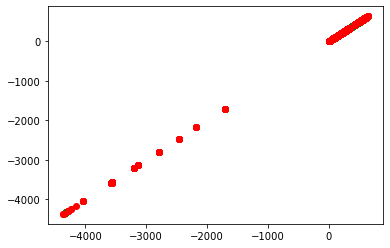

@ ------   pktrate  vs  Pairflow


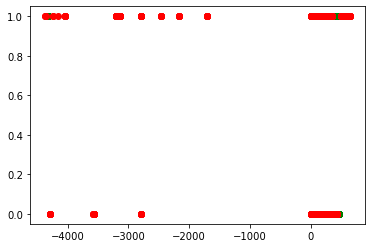

@ ------   pktrate  vs  port_no


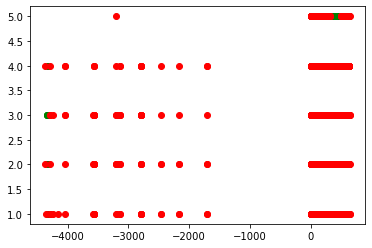

@ ------   pktrate  vs  tx_bytes


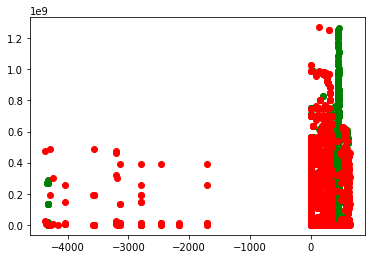

@ ------   pktrate  vs  rx_bytes


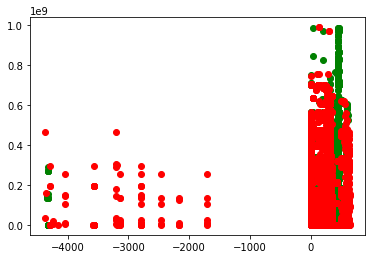

@ ------   pktrate  vs  tx_kbps


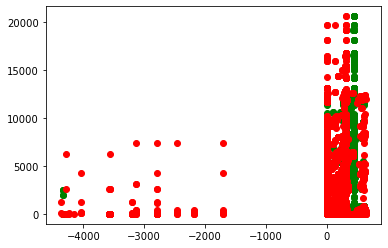

@ ------   pktrate  vs  0


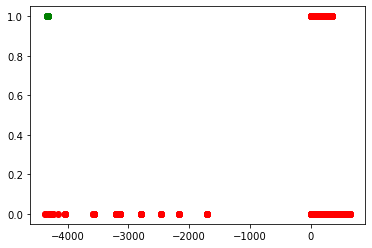

@ ------   pktrate  vs  1


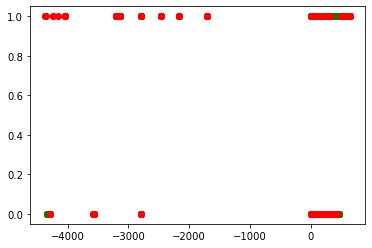

@ ------   pktrate  vs  2


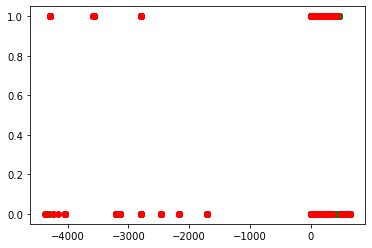

@ ------   Pairflow  vs  dt


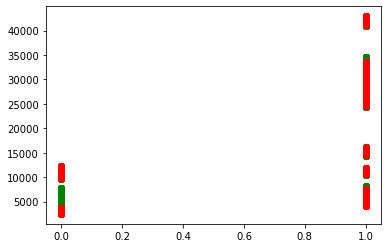

@ ------   Pairflow  vs  switch


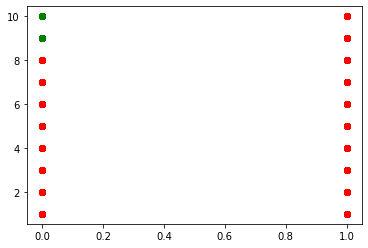

@ ------   Pairflow  vs  pktcount


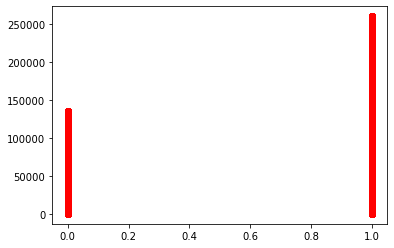

@ ------   Pairflow  vs  bytecount


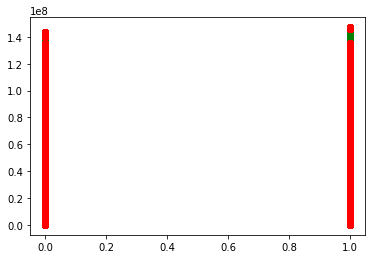

@ ------   Pairflow  vs  dur


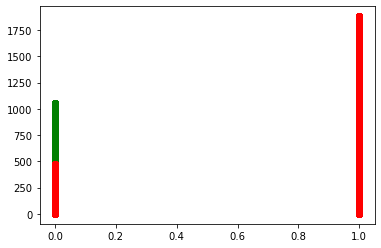

@ ------   Pairflow  vs  dur_nsec


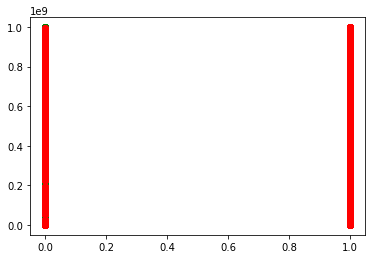

@ ------   Pairflow  vs  tot_dur


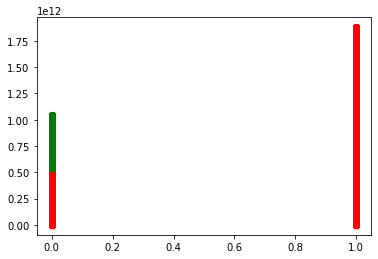

@ ------   Pairflow  vs  flows


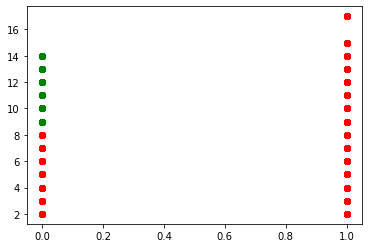

@ ------   Pairflow  vs  packetins


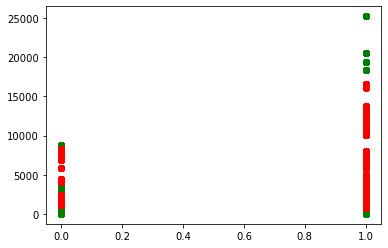

@ ------   Pairflow  vs  pktperflow


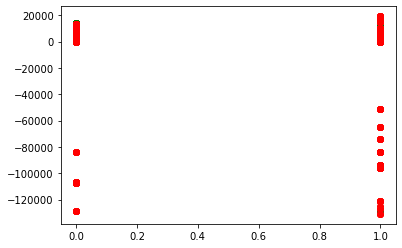

@ ------   Pairflow  vs  byteperflow


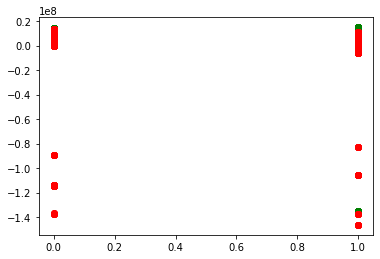

@ ------   Pairflow  vs  pktrate


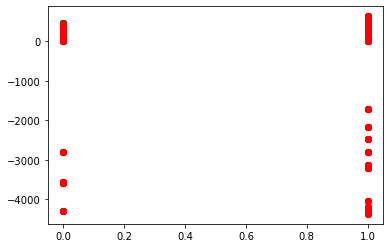

@ ------   Pairflow  vs  Pairflow


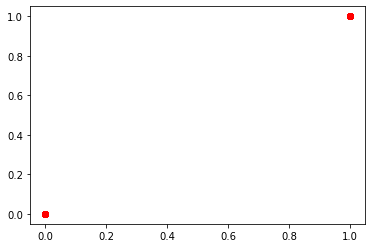

@ ------   Pairflow  vs  port_no


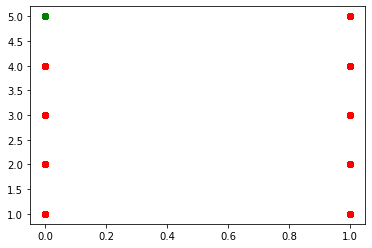

@ ------   Pairflow  vs  tx_bytes


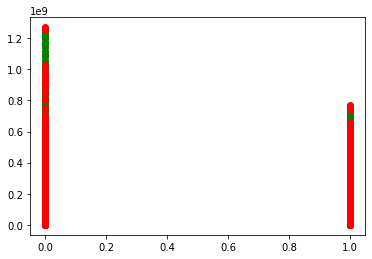

@ ------   Pairflow  vs  rx_bytes


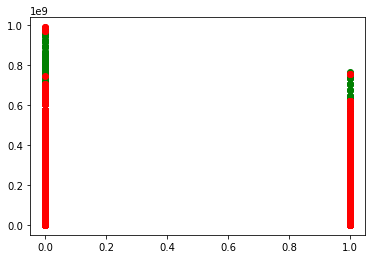

@ ------   Pairflow  vs  tx_kbps


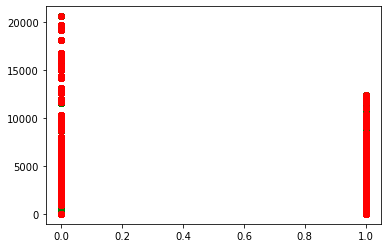

@ ------   Pairflow  vs  0


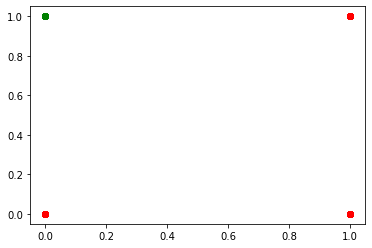

@ ------   Pairflow  vs  1


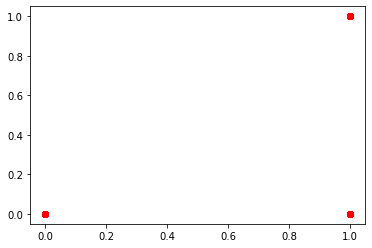

@ ------   Pairflow  vs  2


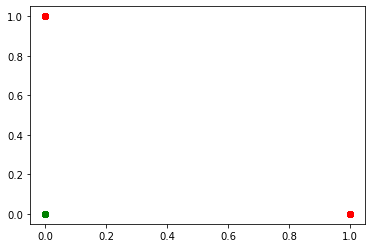

@ ------   port_no  vs  dt


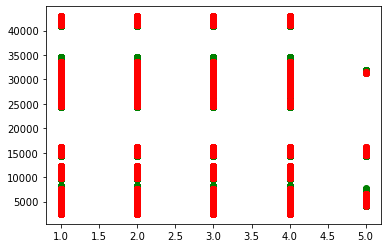

@ ------   port_no  vs  switch


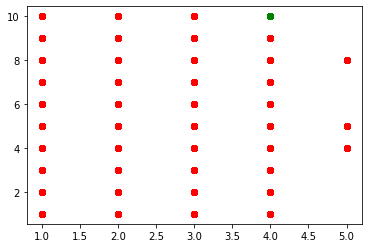

@ ------   port_no  vs  pktcount


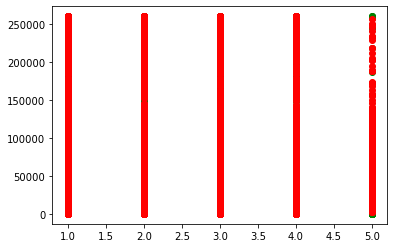

@ ------   port_no  vs  bytecount


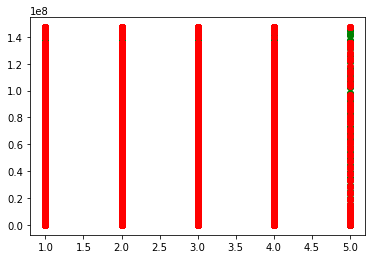

@ ------   port_no  vs  dur


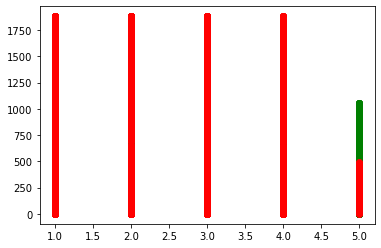

@ ------   port_no  vs  dur_nsec


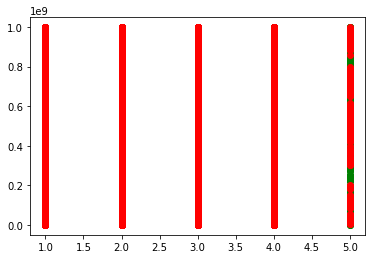

@ ------   port_no  vs  tot_dur


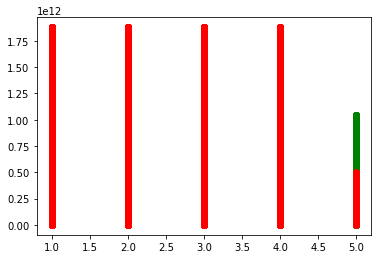

@ ------   port_no  vs  flows


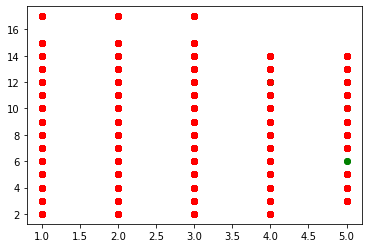

@ ------   port_no  vs  packetins


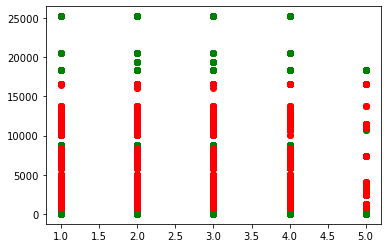

@ ------   port_no  vs  pktperflow


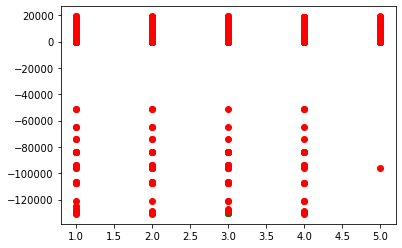

@ ------   port_no  vs  byteperflow


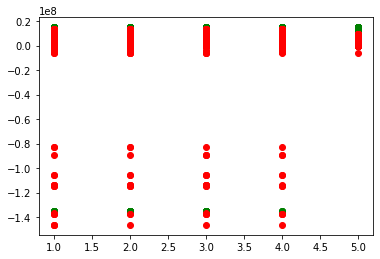

@ ------   port_no  vs  pktrate


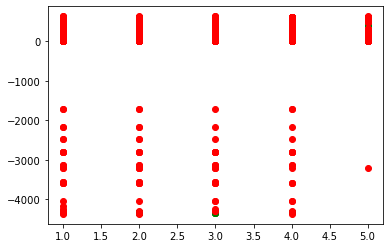

@ ------   port_no  vs  Pairflow


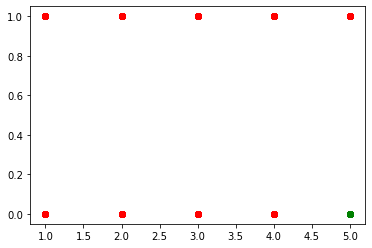

@ ------   port_no  vs  port_no


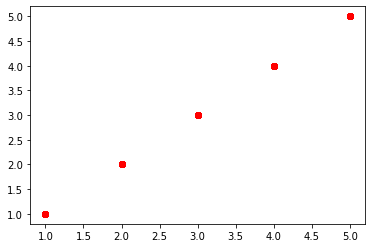

@ ------   port_no  vs  tx_bytes


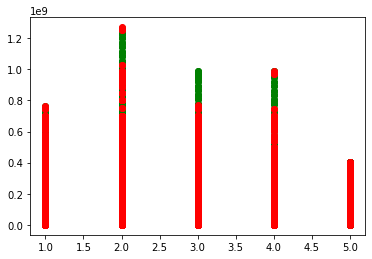

@ ------   port_no  vs  rx_bytes


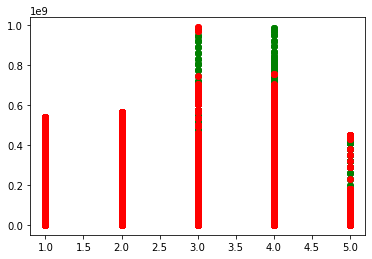

@ ------   port_no  vs  tx_kbps


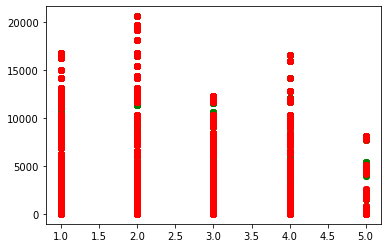

@ ------   port_no  vs  0


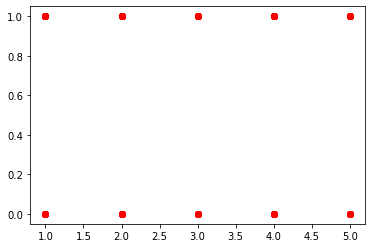

@ ------   port_no  vs  1


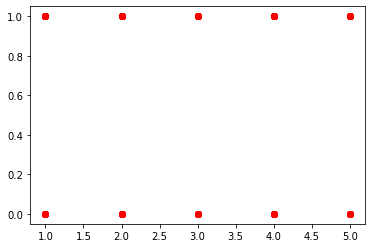

@ ------   port_no  vs  2


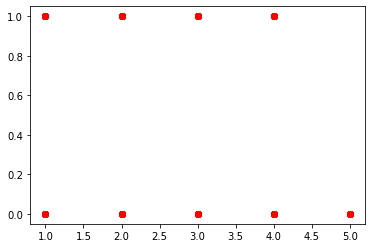

@ ------   tx_bytes  vs  dt


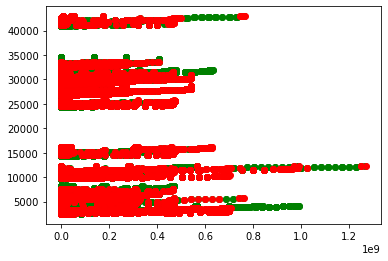

@ ------   tx_bytes  vs  switch


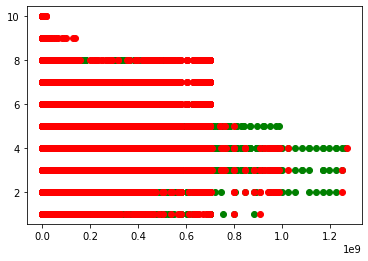

@ ------   tx_bytes  vs  pktcount


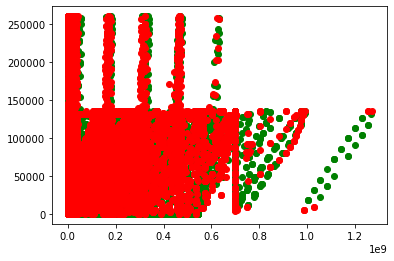

@ ------   tx_bytes  vs  bytecount


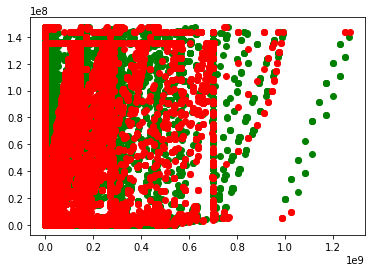

@ ------   tx_bytes  vs  dur


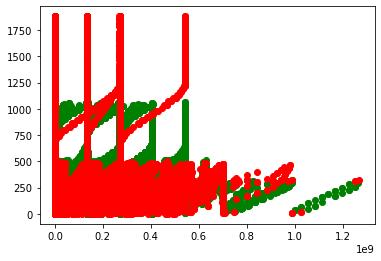

@ ------   tx_bytes  vs  dur_nsec


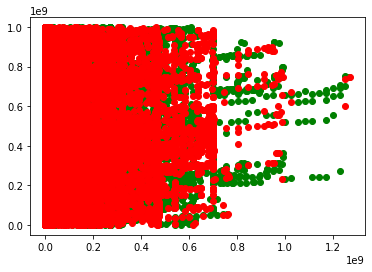

@ ------   tx_bytes  vs  tot_dur


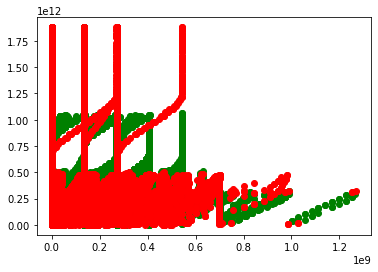

@ ------   tx_bytes  vs  flows


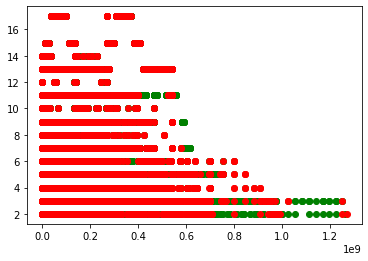

@ ------   tx_bytes  vs  packetins


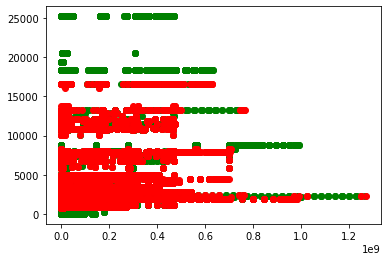

@ ------   tx_bytes  vs  pktperflow


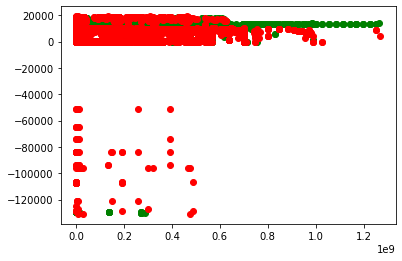

@ ------   tx_bytes  vs  byteperflow


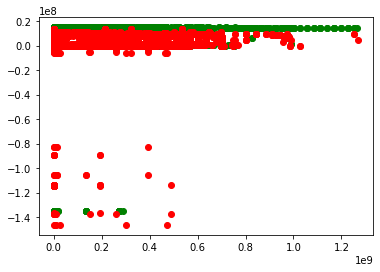

@ ------   tx_bytes  vs  pktrate


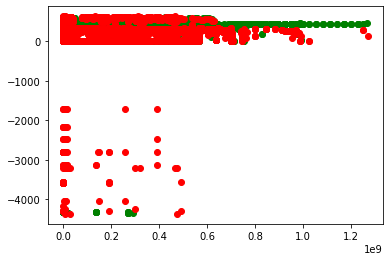

@ ------   tx_bytes  vs  Pairflow


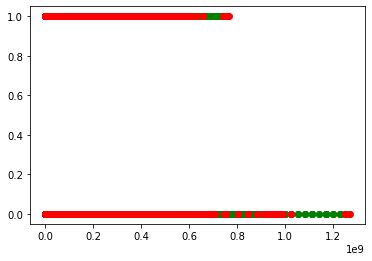

@ ------   tx_bytes  vs  port_no


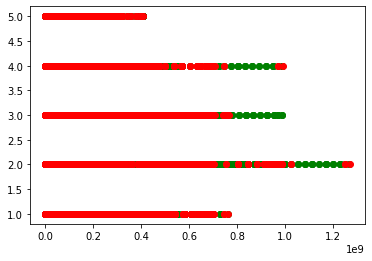

@ ------   tx_bytes  vs  tx_bytes


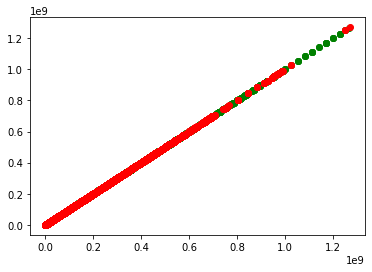

@ ------   tx_bytes  vs  rx_bytes


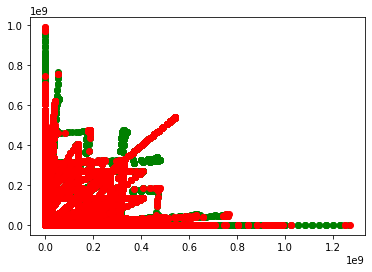

@ ------   tx_bytes  vs  tx_kbps


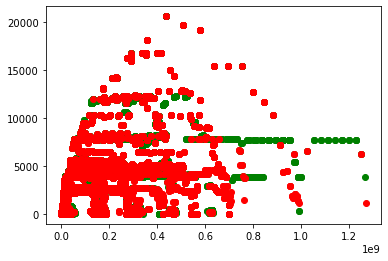

@ ------   tx_bytes  vs  0


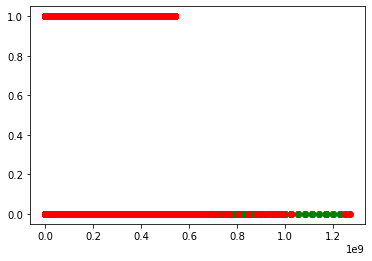

@ ------   tx_bytes  vs  1


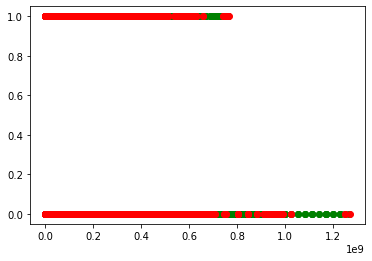

@ ------   tx_bytes  vs  2


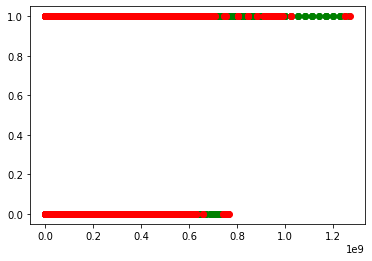

@ ------   rx_bytes  vs  dt


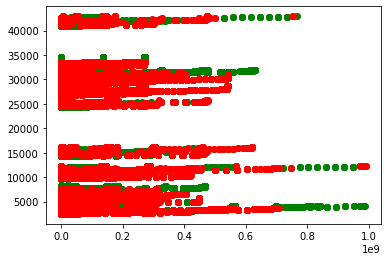

@ ------   rx_bytes  vs  switch


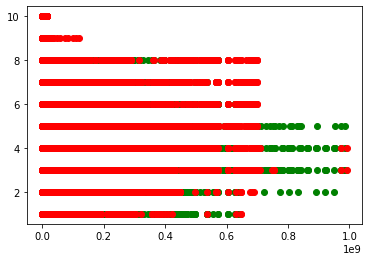

@ ------   rx_bytes  vs  pktcount


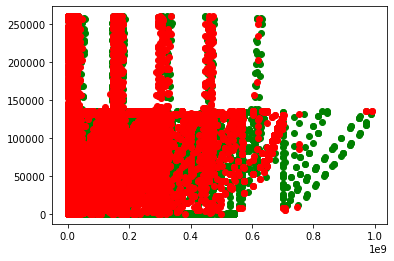

@ ------   rx_bytes  vs  bytecount


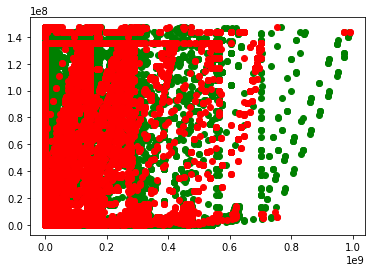

@ ------   rx_bytes  vs  dur


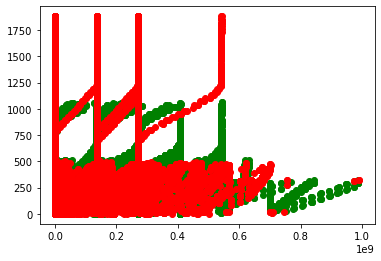

@ ------   rx_bytes  vs  dur_nsec


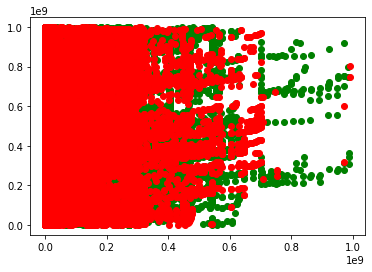

@ ------   rx_bytes  vs  tot_dur


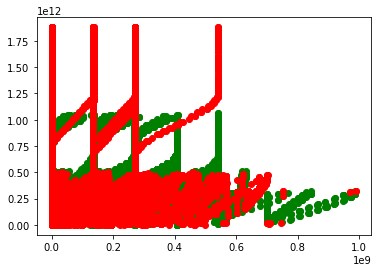

@ ------   rx_bytes  vs  flows


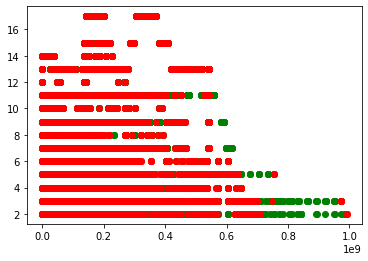

@ ------   rx_bytes  vs  packetins


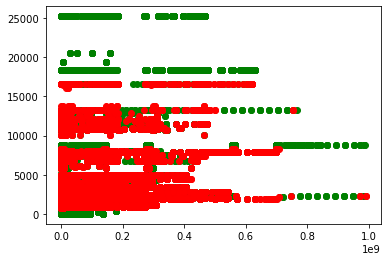

@ ------   rx_bytes  vs  pktperflow


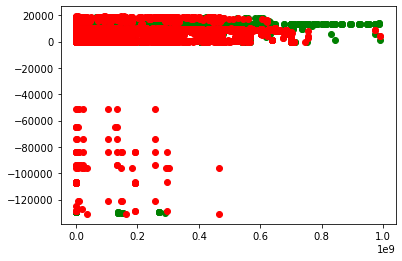

@ ------   rx_bytes  vs  byteperflow


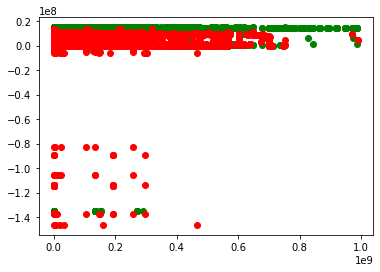

@ ------   rx_bytes  vs  pktrate


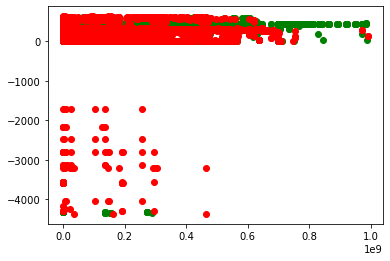

@ ------   rx_bytes  vs  Pairflow


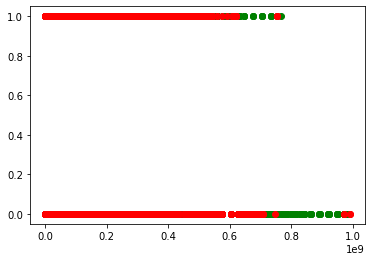

@ ------   rx_bytes  vs  port_no


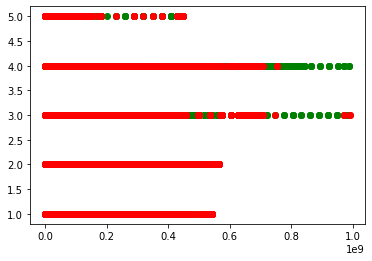

@ ------   rx_bytes  vs  tx_bytes


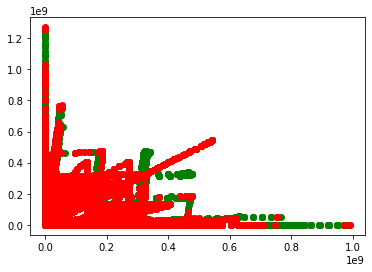

@ ------   rx_bytes  vs  rx_bytes


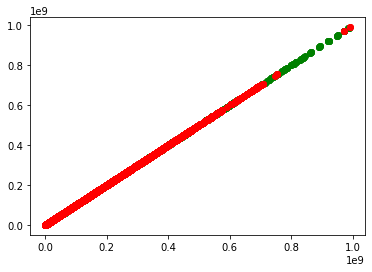

@ ------   rx_bytes  vs  tx_kbps


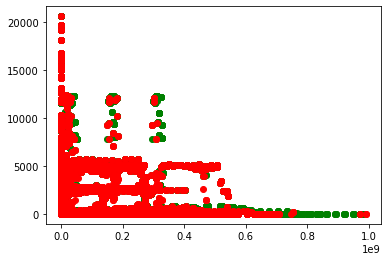

@ ------   rx_bytes  vs  0


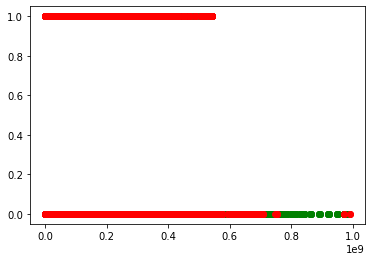

@ ------   rx_bytes  vs  1


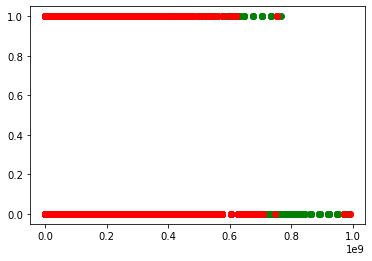

@ ------   rx_bytes  vs  2


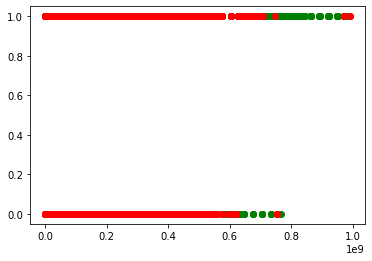

@ ------   tx_kbps  vs  dt


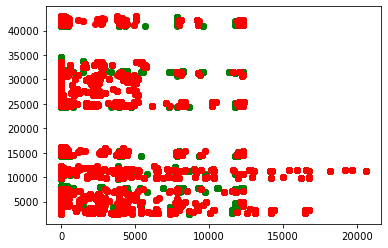

@ ------   tx_kbps  vs  switch


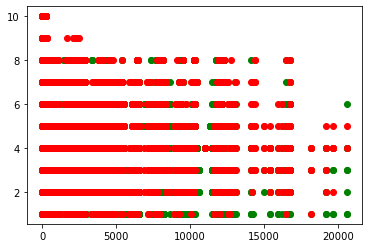

@ ------   tx_kbps  vs  pktcount


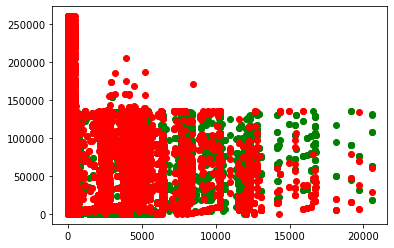

@ ------   tx_kbps  vs  bytecount


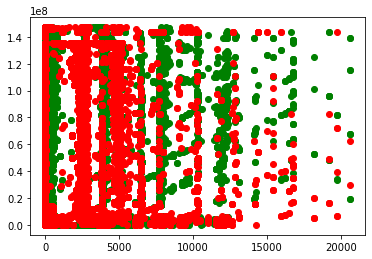

@ ------   tx_kbps  vs  dur


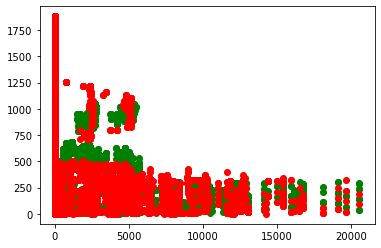

@ ------   tx_kbps  vs  dur_nsec


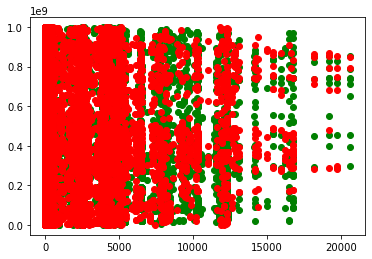

@ ------   tx_kbps  vs  tot_dur


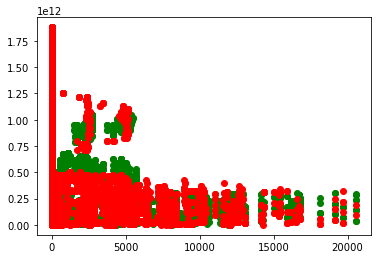

@ ------   tx_kbps  vs  flows


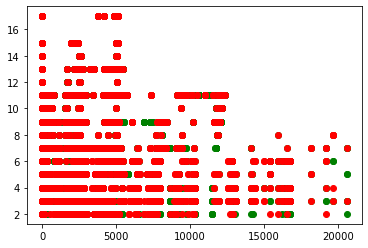

@ ------   tx_kbps  vs  packetins


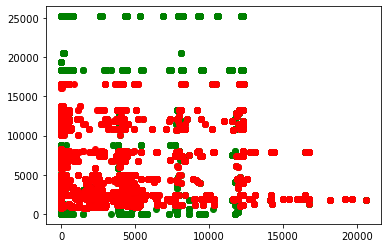

@ ------   tx_kbps  vs  pktperflow


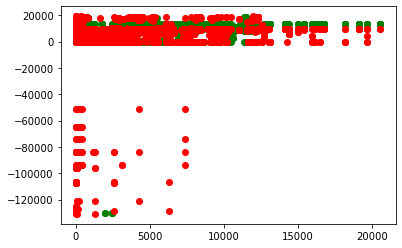

@ ------   tx_kbps  vs  byteperflow


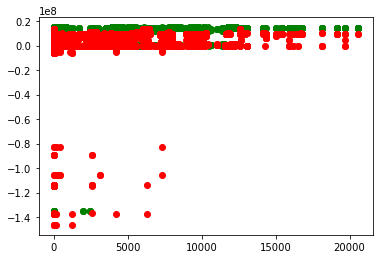

@ ------   tx_kbps  vs  pktrate


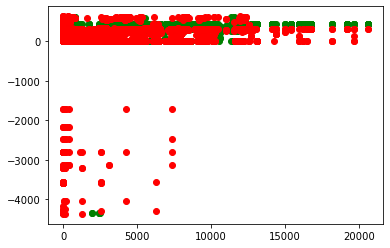

@ ------   tx_kbps  vs  Pairflow


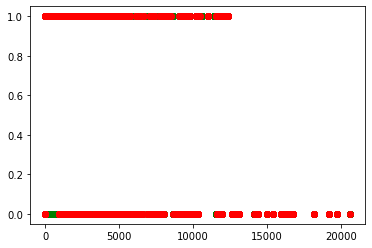

@ ------   tx_kbps  vs  port_no


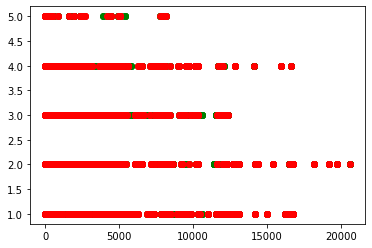

@ ------   tx_kbps  vs  tx_bytes


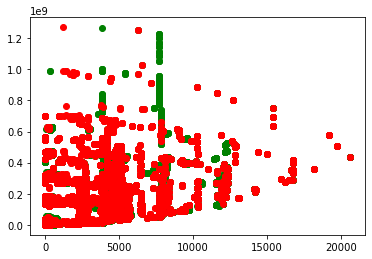

@ ------   tx_kbps  vs  rx_bytes


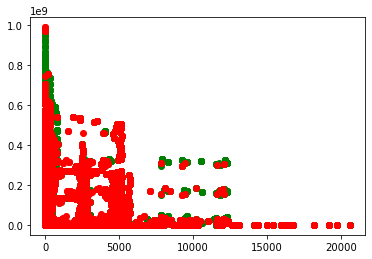

@ ------   tx_kbps  vs  tx_kbps


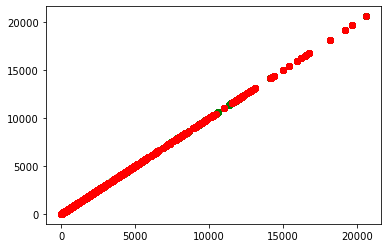

@ ------   tx_kbps  vs  0


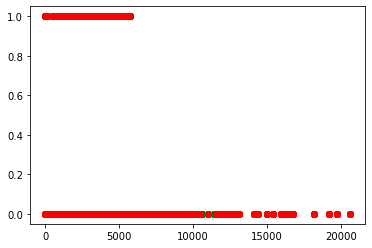

@ ------   tx_kbps  vs  1


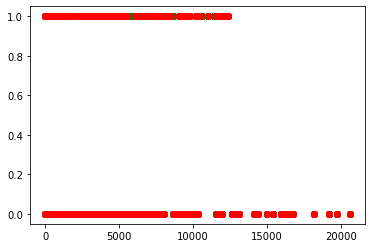

@ ------   tx_kbps  vs  2


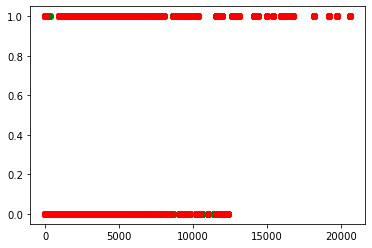

@ ------   0  vs  dt


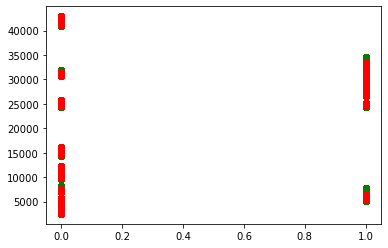

@ ------   0  vs  switch


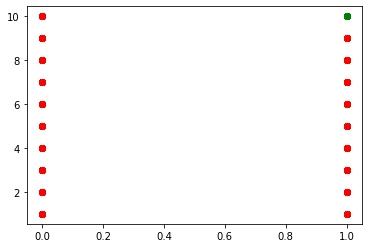

@ ------   0  vs  pktcount


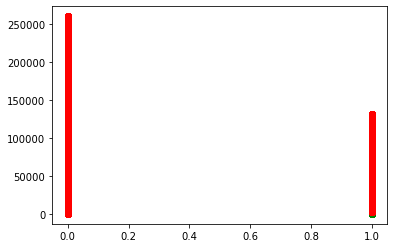

@ ------   0  vs  bytecount


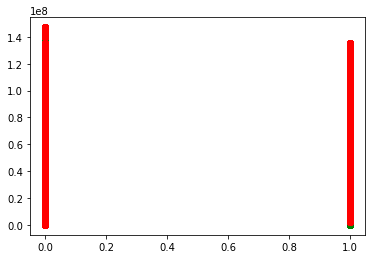

@ ------   0  vs  dur


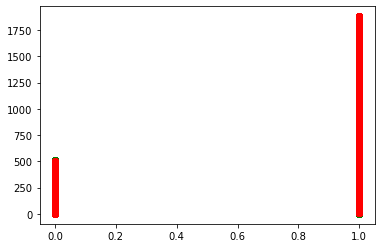

@ ------   0  vs  dur_nsec


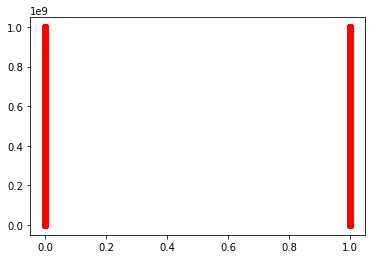

@ ------   0  vs  tot_dur


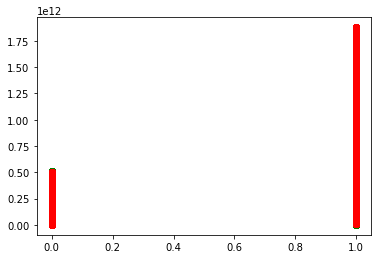

@ ------   0  vs  flows


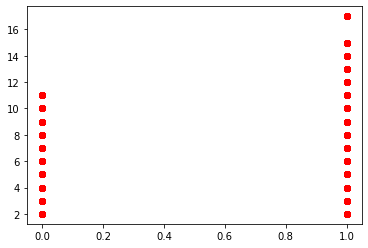

@ ------   0  vs  packetins


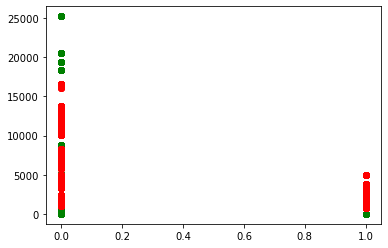

@ ------   0  vs  pktperflow


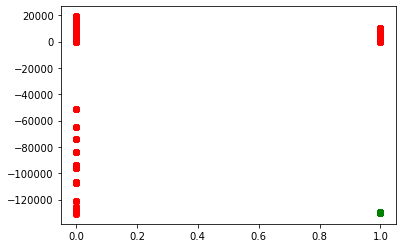

@ ------   0  vs  byteperflow


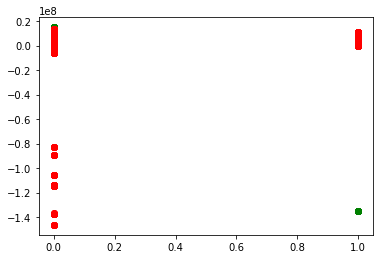

@ ------   0  vs  pktrate


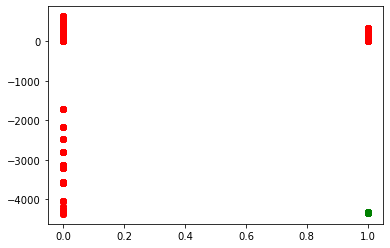

@ ------   0  vs  Pairflow


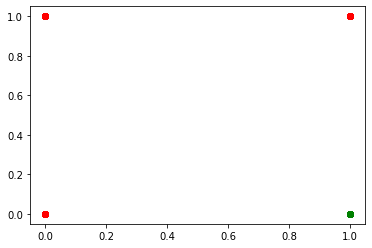

@ ------   0  vs  port_no


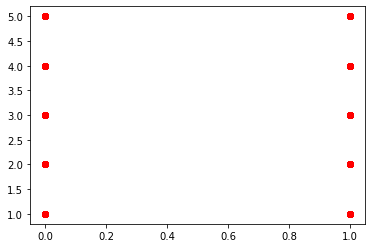

@ ------   0  vs  tx_bytes


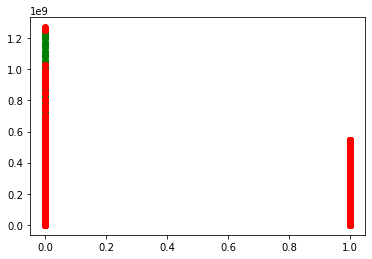

@ ------   0  vs  rx_bytes


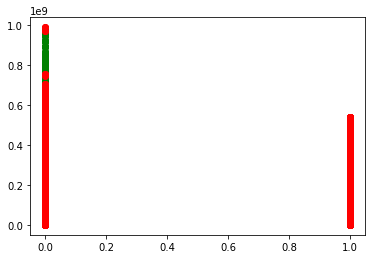

@ ------   0  vs  tx_kbps


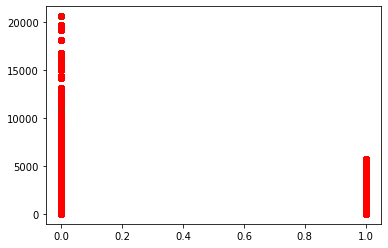

@ ------   0  vs  0


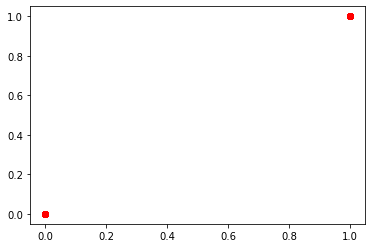

@ ------   0  vs  1


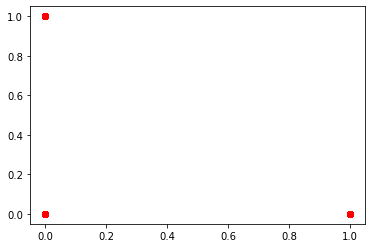

@ ------   0  vs  2


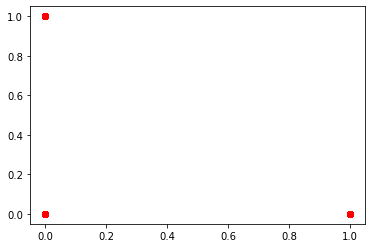

@ ------   1  vs  dt


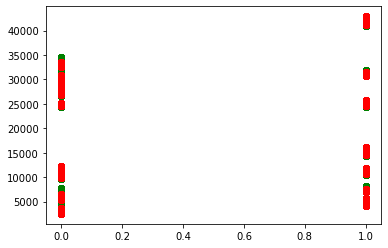

@ ------   1  vs  switch


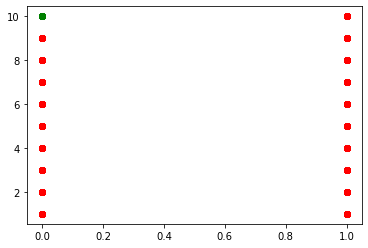

@ ------   1  vs  pktcount


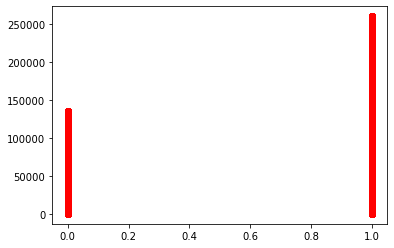

@ ------   1  vs  bytecount


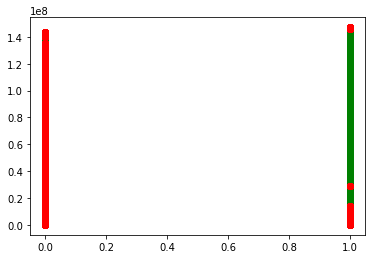

@ ------   1  vs  dur


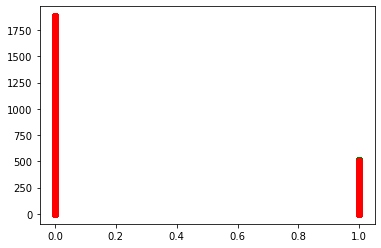

@ ------   1  vs  dur_nsec


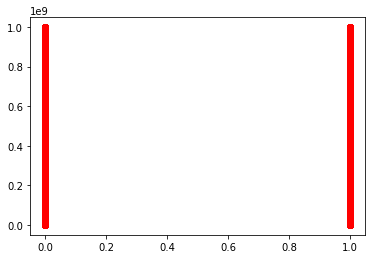

@ ------   1  vs  tot_dur


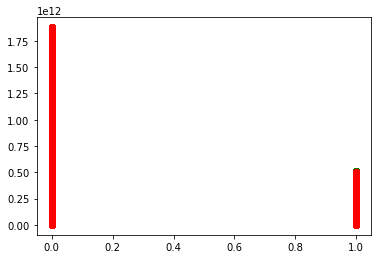

@ ------   1  vs  flows


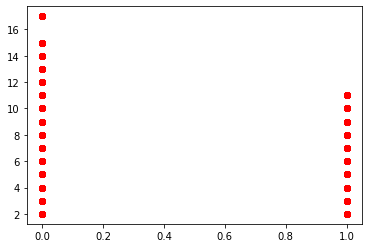

@ ------   1  vs  packetins


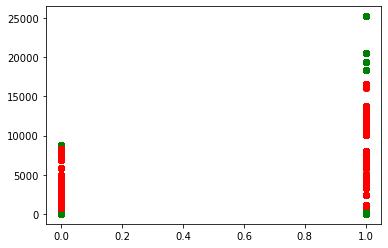

@ ------   1  vs  pktperflow


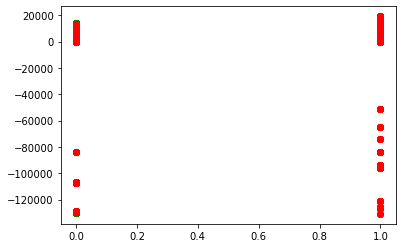

@ ------   1  vs  byteperflow


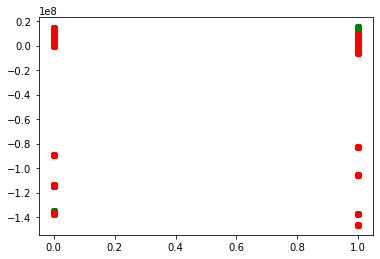

@ ------   1  vs  pktrate


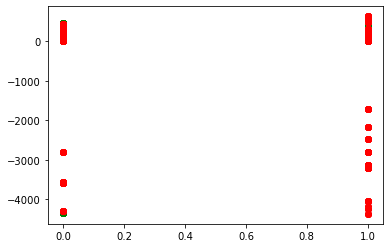

@ ------   1  vs  Pairflow


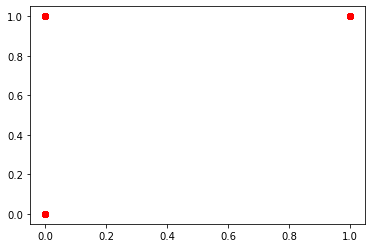

@ ------   1  vs  port_no


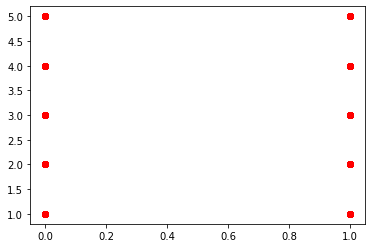

@ ------   1  vs  tx_bytes


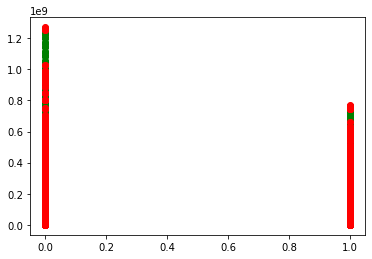

@ ------   1  vs  rx_bytes


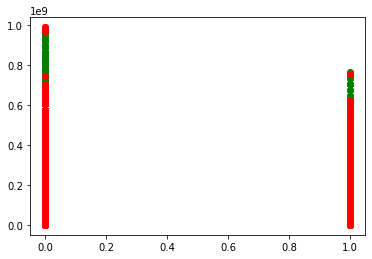

@ ------   1  vs  tx_kbps


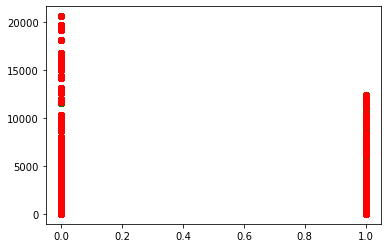

@ ------   1  vs  0


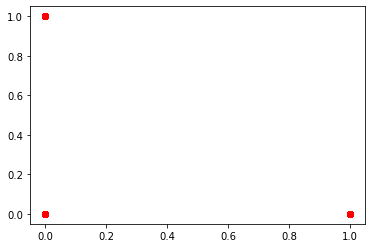

@ ------   1  vs  1


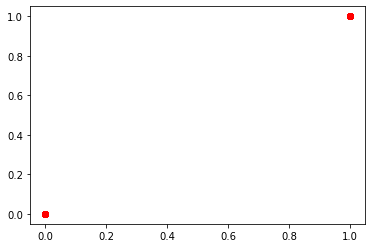

@ ------   1  vs  2


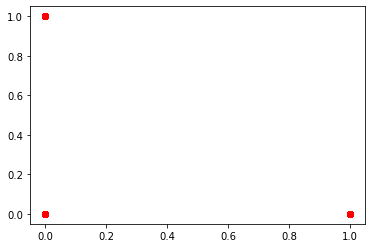

@ ------   2  vs  dt


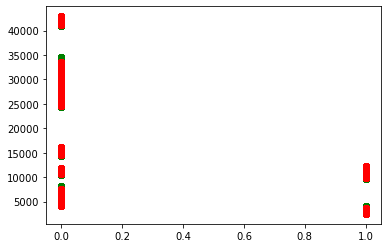

@ ------   2  vs  switch


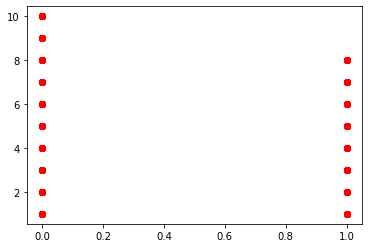

@ ------   2  vs  pktcount


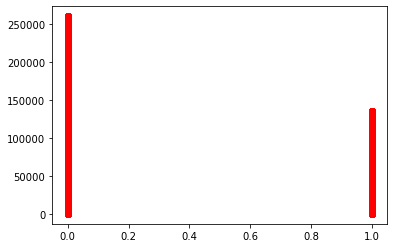

@ ------   2  vs  bytecount


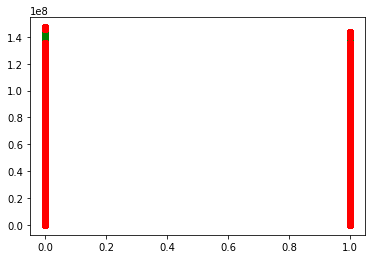

@ ------   2  vs  dur


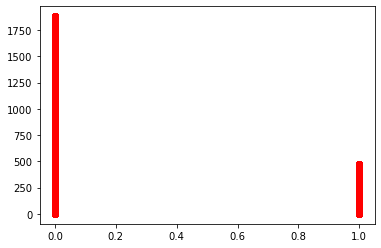

@ ------   2  vs  dur_nsec


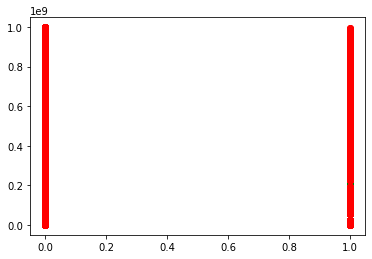

@ ------   2  vs  tot_dur


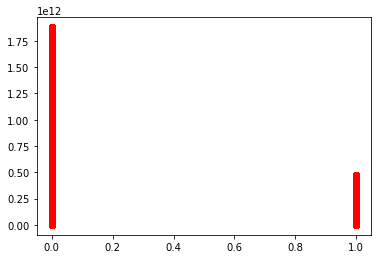

@ ------   2  vs  flows


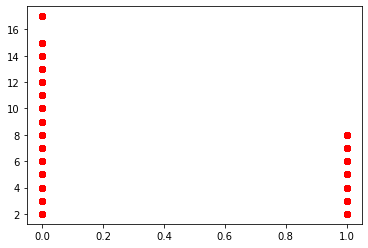

@ ------   2  vs  packetins


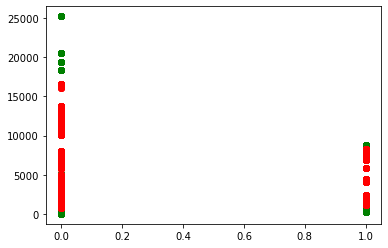

@ ------   2  vs  pktperflow


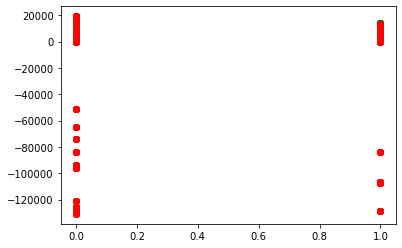

@ ------   2  vs  byteperflow


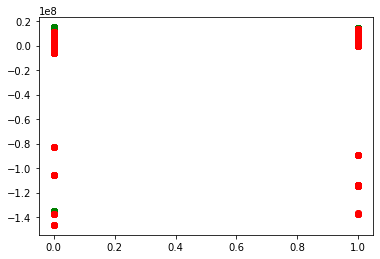

@ ------   2  vs  pktrate


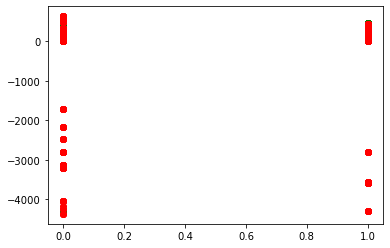

@ ------   2  vs  Pairflow


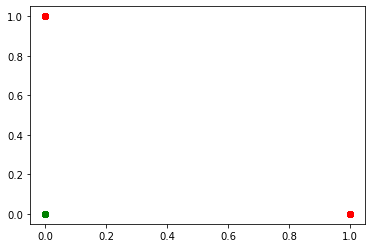

@ ------   2  vs  port_no


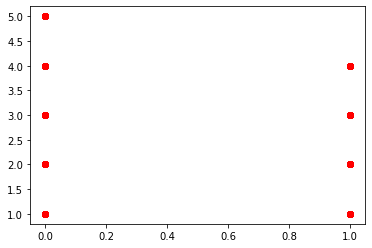

@ ------   2  vs  tx_bytes


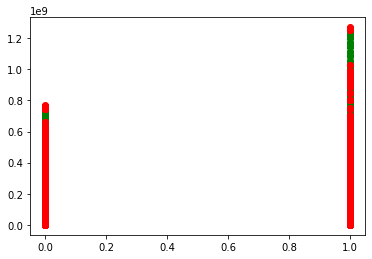

@ ------   2  vs  rx_bytes


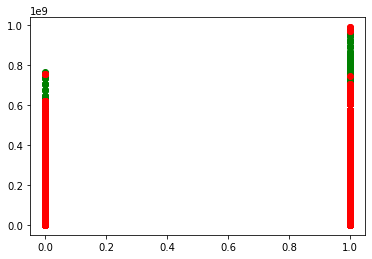

@ ------   2  vs  tx_kbps


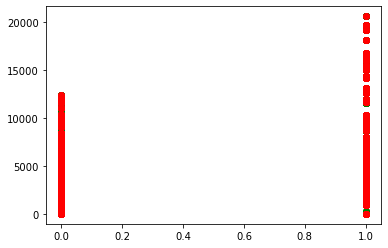

@ ------   2  vs  0


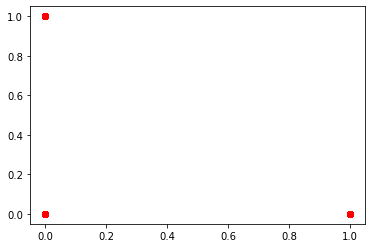

@ ------   2  vs  1


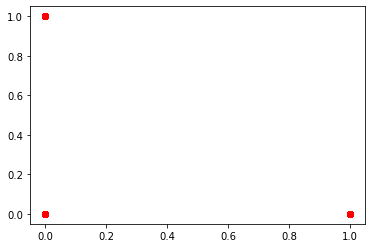

@ ------   2  vs  2


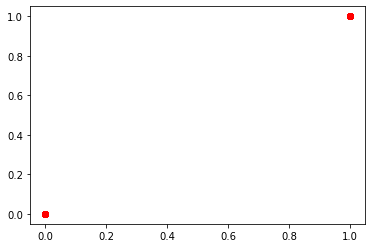

In [17]:
for i in ll:
    for j in ll:
        print("@ ------  ",i," vs ",j)
        plt.scatter(x_train_0[i],x_train_0[j],color="g")
        plt.scatter(x_train_1[i],x_train_1[j],color="r")
        plt.show()